# **OPIM 5770 : Advanced Business Analytics and Project Management**
---

## **UConn - Atlas Air Worldwide**   

## **Final Analytics - Modeling and External Research**

### **Team 7**

* Akshay Kumar Pydi
* Oluwademilade Ajayi
* Remaliah Moses Gedala
* Sagar Thorat
* Suyash Singh
* Yuting Hou

# **MODELING**
---
In this file, we will be working on building an Employee Attrition model and also find out significant columns that contribute towards the Attrition of Employees.

# **Importing Modules**
---
This section consists of process to import all the models that have been used in the coding process.

In [1]:
#importing modules
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn import tree

# **Importing Data File**
---
In this section, we will be importing dataset which has been extracted from the Oracle database based on various logics that were mentioned in SQL Query code file names "Model Query File.sql".

The data can be viewed by using the below link:

https://drive.google.com/file/d/1QjzcLAFbsn6sBc3tpU-U5vyrqP6FaJbC/view?usp=sharing

In [2]:
# Step 1: copy & paste the shared link you will get from Google Drive

URL = 'https://drive.google.com/file/d/1QjzcLAFbsn6sBc3tpU-U5vyrqP6FaJbC/view?usp=sharing' # ModelingDataFile

# Step 2: copy & paste the command below (this part of the command is fixed)
fixed_path = 'https://drive.google.com/uc?export=download&id='

# Step 3: Extract the file ID from the URL (this part of the command is fixed)
file_path = URL.split('/')[-2]

# Retrieve the CSV data and build a dataframe
df = pd.read_csv(fixed_path + file_path)

df.head(5)

,CURRENT_STATUS,ID,CHANGEINTRIPCOUNT,CHANGE_IN_HOURS,CURRENT_AGE,FLEET,SEAT,CHANGEINOFFDUTY,CHANGEINRESERVE,CHANGEINTRAINING,CHANGEINDHTIME,CHANGEINDHCOUNT,AVG_DELAY,AVG_NO_OF_DELAYS,AVG_FLIGHT_BLOCKHOURS,CONTRACTS_WORKED,LATENIGHT,TRIPLENGTH,TOTAL_LAYOVERS,INT_COUNT,DOM_COUNT
0,ATTRITION,1009,0.44,-5.78,39,767,FO,-1.22,0.44,0.11,2.95,1.56,10.79,2,4.75,13,4,14.56,3.78,1.44,0.56
1,ATTRITION,1014,-0.67,-41.86,64,747,CA,11.67,0.67,-2.33,-1.18,-1.33,12.21,2,6.35,10,2,9.00,2.33,1.00,0.00
2,ATTRITION,1019,0.20,-70.45,37,747,FO,0.90,-1.60,5.90,14.57,3.70,11.43,3,6.61,12,3,10.70,4.00,1.10,0.40
3,ATTRITION,1029,0.17,-77.27,43,747,FO,3.33,-3.50,0.00,23.77,5.50,6.88,2,7.39,12,4,15.00,4.33,1.83,0.17
4,ATTRITION,1043,0.00,-26.98,48,747,FO,3.75,-2.50,0.00,3.91,1.13,7.90,2,6.94,14,4,10.88,3.75,1.50,0.00


In [3]:
print(df.shape)

(2758, 21)


# **Sampling**
---
This section consists of all the variables and its details. In addition to this, details related to removal of any Unique Identifiers are given here.

* Current_Status = Attrition(1) / Existing (0)
* CHANGEINTRIPCOUNT = Difference in Number of Trips for an Employee
* CHANGE_IN_HOURS = Change in the Number of Block hours worked by an   Employee Excluding Deadh Head Hours
* CURRENT_AGE = Age of an Employee
* FLEET = Fleet to which an Employee belongs
* SEAT = CA/FO
* NO_OF_YEARS_WORKED = Total number of Years worked based on Termination date or current Date
* CHANGEINOFFDUTY = Change in the off-duty hours
* CHANGEINRESERVE = Change in the Reserve Duty Hours
* CHANGEINTRAINING = Change in the Training hours
* CHANGEINDHTIME = Change in the Dead Head Time
* CHANGEINDHCOUNT = Change in the Dead Head Count
* AVG_DELAY = Average delay of all the flights at the Employee level
* AVG_NO_OF_DELAYS = Average number of delays faced by an employees during his total trips
* AVG_FLIGHT_BLOCKHOURS = Average flight block hours 
* CONTRACTS_WORKED = Number of Distinct Contracts Worked by an Employee
* LATENIGHT = Number of Late-night trips taken by an employee - Flights that started after 9 PM
* Trip_Length = Average number of Trips per employees
* Total_Layover = Average Layovers per employee
* Int_Count = International Trips count for employees at an averge per month
* Dom_Count = Domestic Trip Count for employees at an average per month.



In [4]:
# ID is being dropped here as it is a Unique Identifier
df = df.drop(['ID'], 1)

In [5]:
# Check for the info on the total colunns and the values present. 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2758 entries, 0 to 2757
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CURRENT_STATUS         2758 non-null   object 
 1   CHANGEINTRIPCOUNT      2758 non-null   float64
 2   CHANGE_IN_HOURS        2758 non-null   float64
 3   CURRENT_AGE            2758 non-null   int64  
 4   FLEET                  2758 non-null   int64  
 5   SEAT                   2758 non-null   object 
 6   CHANGEINOFFDUTY        2758 non-null   float64
 7   CHANGEINRESERVE        2758 non-null   float64
 8   CHANGEINTRAINING       2758 non-null   float64
 9   CHANGEINDHTIME         2758 non-null   float64
 10  CHANGEINDHCOUNT        2758 non-null   float64
 11  AVG_DELAY              2758 non-null   float64
 12  AVG_NO_OF_DELAYS       2758 non-null   int64  
 13  AVG_FLIGHT_BLOCKHOURS  2758 non-null   float64
 14  CONTRACTS_WORKED       2758 non-null   int64  
 15  LATE

All the columns have values and there are 2758 records on a total. We made sure that the query logic handles all the missing values and the necessary actions are taken.

In [6]:
# There are no missing values in any of the columns
print(pd.isnull(df).sum())

CURRENT_STATUS           0
CHANGEINTRIPCOUNT        0
CHANGE_IN_HOURS          0
CURRENT_AGE              0
FLEET                    0
SEAT                     0
CHANGEINOFFDUTY          0
CHANGEINRESERVE          0
CHANGEINTRAINING         0
CHANGEINDHTIME           0
CHANGEINDHCOUNT          0
AVG_DELAY                0
AVG_NO_OF_DELAYS         0
AVG_FLIGHT_BLOCKHOURS    0
CONTRACTS_WORKED         0
LATENIGHT                0
TRIPLENGTH               0
TOTAL_LAYOVERS           0
INT_COUNT                0
DOM_COUNT                0
dtype: int64


In [7]:
# Code to check on the disctribution of data for each column based on 
# statistical terms like mean, median, standar deviation and quantile ranges. 
df.describe()

,CHANGEINTRIPCOUNT,CHANGE_IN_HOURS,CURRENT_AGE,FLEET,CHANGEINOFFDUTY,CHANGEINRESERVE,CHANGEINTRAINING,CHANGEINDHTIME,CHANGEINDHCOUNT,AVG_DELAY,AVG_NO_OF_DELAYS,AVG_FLIGHT_BLOCKHOURS,CONTRACTS_WORKED,LATENIGHT,TRIPLENGTH,TOTAL_LAYOVERS,INT_COUNT,DOM_COUNT
count,2758.000000,2758.000000,2758.000000,2758.000000,2758.000000,2758.000000,2758.000000,2758.000000,2758.000000,2758.000000,2758.000000,2758.000000,2758.000000,2758.000000,2758.000000,2758.000000,2758.000000,2758.000000
mean,0.069036,-16.528539,45.005076,755.495286,0.660780,-0.929583,1.041421,4.798474,1.595283,7.251171,2.349891,6.046472,25.455040,7.534083,12.523455,3.908738,1.435946,0.376273
std,0.254023,19.568350,10.206570,12.765220,2.237314,1.290728,2.416666,4.368204,1.269193,5.857272,0.553079,1.987729,22.730589,5.460522,6.139622,1.888602,0.655542,0.315377
min,-2.000000,-122.580000,24.000000,737.000000,-9.880000,-16.000000,-5.330000,-26.240000,-7.000000,0.030000,1.000000,1.760000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.040000,-26.670000,37.000000,747.000000,-0.227500,-1.330000,0.000000,2.062500,0.790000,2.650000,2.000000,4.330000,5.000000,3.000000,10.500000,2.750000,1.210000,0.210000
50%,0.040000,-13.430000,45.000000,747.000000,0.580000,-0.540000,0.080000,4.440000,1.460000,6.690000,2.000000,6.500000,18.000000,7.000000,12.880000,3.930000,1.460000,0.330000
75%,0.170000,-3.572500,53.000000,767.000000,1.580000,-0.080000,1.090000,7.097500,2.290000,10.240000,3.000000,7.130000,45.000000,11.000000,14.830000,5.000000,1.670000,0.500000
max,1.630000,33.560000,64.000000,777.000000,20.600000,3.330000,23.500000,48.530000,18.500000,96.330000,5.000000,14.820000,104.000000,29.000000,254.000000,47.000000,26.000000,11.000000


# **Exploration**
--- 
In this section, we will exploring on all the variables for any key patterns, Outliers, distribution of Categorical and Continuous variables

## Target Variable Exploration

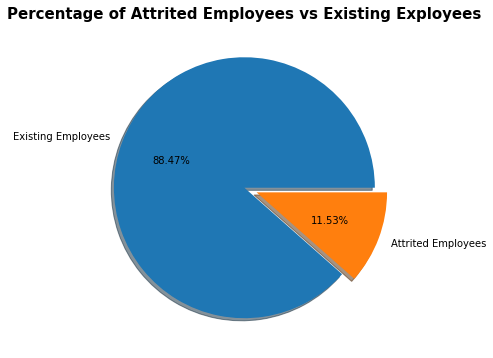

In [8]:
# Percentage distribution of Target variable Attrition Flag - pie chart
import matplotlib.pyplot as plt
count=pd.value_counts(df['CURRENT_STATUS']).tolist()
plt.figure(figsize=(6,6))
plt.title("Percentage of Attrited Employees vs Existing Exployees", fontsize = 15, fontweight='bold')
plt.pie(x=count,labels=["Existing Employees","Attrited Employees"],autopct='%.2f%%',  explode=(0,0.1), shadow=True)
plt.show()

We see that the data is biased with more of Exisitng employees records compared to Attrition employees records. Hence, we might need to validate the scenarios for the avoiding of biased models.

In [9]:
#Show Current_Status as an integer, either 1 or 0
# 0 = Exisiting Employee
# 1 = Attrited Employee


df["CURRENT_STATUS"] = df["CURRENT_STATUS"].map({"ATTRITION":1, "EXISTING":0})
df

,CURRENT_STATUS,CHANGEINTRIPCOUNT,CHANGE_IN_HOURS,CURRENT_AGE,FLEET,SEAT,CHANGEINOFFDUTY,CHANGEINRESERVE,CHANGEINTRAINING,CHANGEINDHTIME,CHANGEINDHCOUNT,AVG_DELAY,AVG_NO_OF_DELAYS,AVG_FLIGHT_BLOCKHOURS,CONTRACTS_WORKED,LATENIGHT,TRIPLENGTH,TOTAL_LAYOVERS,INT_COUNT,DOM_COUNT
0,1,0.44,-5.78,39,767,FO,-1.22,0.44,0.11,2.95,1.56,10.79,2,4.75,13,4,14.56,3.78,1.44,0.56
1,1,-0.67,-41.86,64,747,CA,11.67,0.67,-2.33,-1.18,-1.33,12.21,2,6.35,10,2,9.00,2.33,1.00,0.00
2,1,0.20,-70.45,37,747,FO,0.90,-1.60,5.90,14.57,3.70,11.43,3,6.61,12,3,10.70,4.00,1.10,0.40
3,1,0.17,-77.27,43,747,FO,3.33,-3.50,0.00,23.77,5.50,6.88,2,7.39,12,4,15.00,4.33,1.83,0.17
4,1,0.00,-26.98,48,747,FO,3.75,-2.50,0.00,3.91,1.13,7.90,2,6.94,14,4,10.88,3.75,1.50,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2753,0,0.15,-5.35,30,767,FO,1.31,-2.08,1.46,2.54,1.46,4.08,2,5.48,9,2,12.08,3.31,1.31,0.38
2754,0,0.04,-12.40,64,747,CA,0.71,-0.04,0.08,6.49,1.71,8.98,3,6.57,51,14,14.25,4.46,1.50,0.25
2755,0,0.08,0.91,41,747,FO,0.04,-0.17,0.08,1.54,0.42,7.84,3,7.22,56,14,15.38,5.92,1.83,0.33
2756,0,0.04,-7.29,60,747,CA,2.46,-1.17,0.04,6.25,2.58,18.34,3,6.32,52,9,11.50,3.79,1.25,0.33


## Correlation of Continuous Variables
---
In this section, we will look into the heat maps for the correlation values of all the continuous variables.

In [10]:
#Correlation between variables
corr = df.corr()
corr

,CURRENT_STATUS,CHANGEINTRIPCOUNT,CHANGE_IN_HOURS,CURRENT_AGE,FLEET,CHANGEINOFFDUTY,CHANGEINRESERVE,CHANGEINTRAINING,CHANGEINDHTIME,CHANGEINDHCOUNT,AVG_DELAY,AVG_NO_OF_DELAYS,AVG_FLIGHT_BLOCKHOURS,CONTRACTS_WORKED,LATENIGHT,TRIPLENGTH,TOTAL_LAYOVERS,INT_COUNT,DOM_COUNT
CURRENT_STATUS,1.000000,-0.180778,-0.106493,-0.107867,0.040783,0.360048,-0.139637,-0.026542,-0.048022,-0.062552,-0.048730,-0.084717,0.020743,-0.224323,-0.295240,-0.025562,-0.037383,0.012175,0.018453
CHANGEINTRIPCOUNT,-0.180778,1.000000,0.268261,0.070405,0.003669,-0.585156,-0.120971,0.073361,0.466288,0.496351,0.069759,0.071799,-0.024442,0.056283,0.138773,0.206037,0.131221,0.266969,0.178843
CHANGE_IN_HOURS,-0.106493,0.268261,1.000000,0.005080,0.166197,-0.287513,-0.332945,0.294461,-0.183687,-0.229116,-0.123798,-0.105936,0.087598,-0.258541,-0.182570,-0.211471,-0.095242,-0.080081,0.040689
CURRENT_AGE,-0.107867,0.070405,0.005080,1.000000,-0.063303,-0.104428,0.235584,-0.152206,-0.013741,-0.009021,0.077002,0.067408,0.020813,0.198041,0.260793,0.018835,0.015009,-0.007291,-0.061396
FLEET,0.040783,0.003669,0.166197,-0.063303,1.000000,-0.050192,-0.020413,-0.027629,-0.102269,-0.087450,-0.318526,-0.377498,0.180388,-0.395252,-0.164035,0.005692,0.001447,-0.030355,0.186240
CHANGEINOFFDUTY,0.360048,-0.585156,-0.287513,-0.104428,-0.050192,1.000000,-0.119072,-0.165059,-0.345889,-0.378801,-0.078297,-0.059698,0.043251,-0.153780,-0.235657,-0.144061,-0.136505,-0.104435,-0.089369
CHANGEINRESERVE,-0.139637,-0.120971,-0.332945,0.235584,-0.020413,-0.119072,1.000000,-0.447876,-0.262009,-0.208021,-0.040074,-0.063264,-0.121549,0.196081,0.366305,0.019096,-0.040303,-0.050968,-0.146195
CHANGEINTRAINING,-0.026542,0.073361,0.294461,-0.152206,-0.027629,-0.165059,-0.447876,1.000000,0.101578,0.064627,0.077546,0.103719,0.011047,-0.266690,-0.390771,-0.234729,-0.100005,-0.148725,0.205800
CHANGEINDHTIME,-0.048022,0.466288,-0.183687,-0.013741,-0.102269,-0.345889,-0.262009,0.101578,1.000000,0.893466,0.232865,0.235510,0.073490,0.240555,0.174216,0.341352,0.302821,0.318152,0.109315
CHANGEINDHCOUNT,-0.062552,0.496351,-0.229116,-0.009021,-0.087450,-0.378801,-0.208021,0.064627,0.893466,1.000000,0.206189,0.153568,-0.113224,0.262498,0.175998,0.431093,0.264110,0.361198,0.222289


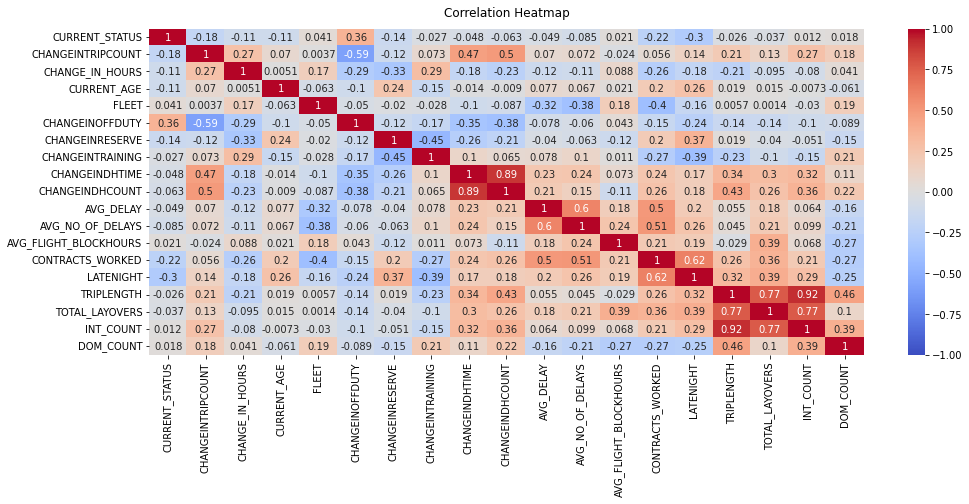

In [11]:
# Importing modules
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Plotting heatmap of Correlation matrix for all the numberical variables
plt.figure(figsize=(16, 6))   # to increase the size of heatmap
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

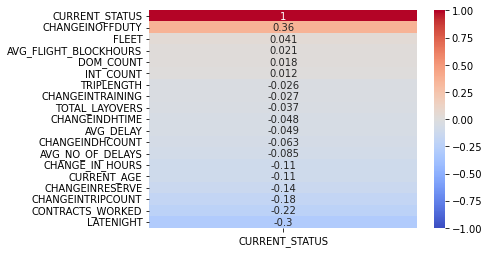

In [12]:
#heatmap of target variable for checking correlation with other variables
heatmap_2 = sns.heatmap(df.corr()[['CURRENT_STATUS']].sort_values(by='CURRENT_STATUS', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')

* We see that Change in Dead Head time and Dead Head count are very strongly correlated, therefore we can make sure to consider any one of the variable which can easily capture 89% of data. Hence, we are excluding Change in DH Count.

* Trip Length, Total Layover and Int_count are very strongly correlated and hence we can choose to perform Pricipal Component analysis for these variables. But, based on the Logit regression P values Trip lenght is showing a p value of greater then 0.05, hence we have excluded Trip_Length. 

## Data visualizations for Categorical variables
---
In this section we will be exploring the Data visualizations for the Categorical variables that we have in our Dataset.


### FLEET

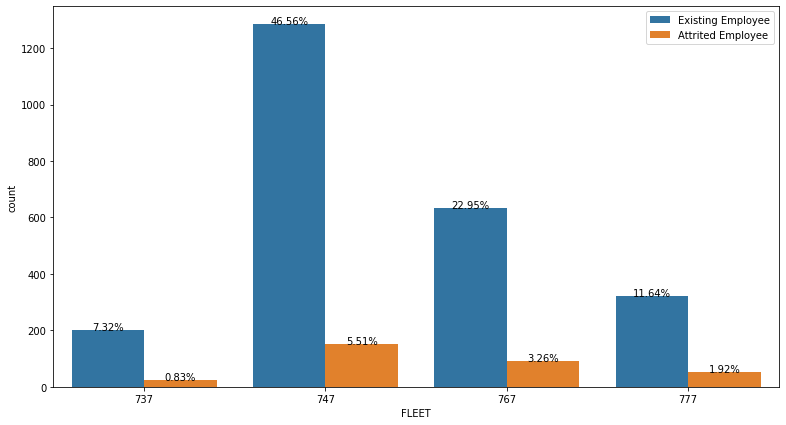

In [13]:
fig, axis = plt.subplots(figsize=(13,7)) # Assigning the Plot size
ax=sns.countplot(x='FLEET',data=df, hue='CURRENT_STATUS') # Taking the X and Y axis of the plot
ax.legend(bbox_to_anchor=(1, 1),labels=["Existing Employee","Attrited Employee"]) # Defining the Legends.

for p in ax.patches: # A loop to show the values in Percentage for the Bar Plots.
  ax.text(p.get_x()+p.get_width()/2# to center the % value on the bar chart at the top by X axis
          ,p.get_height() # to show the Y position of the percentage value
          ,'{:1.2f}%'.format(p.get_height()/len(df)*100) # To calculate the Percentage value for easy representation
          ,ha="center" # To centralize the Whole texting of the % value.
          )

We see that more percentage of people attrited are from 747 fleet and 767 but the number of people in this fleet are high. So, this could be the reason for more attritions in these fleets. 

### SEAT

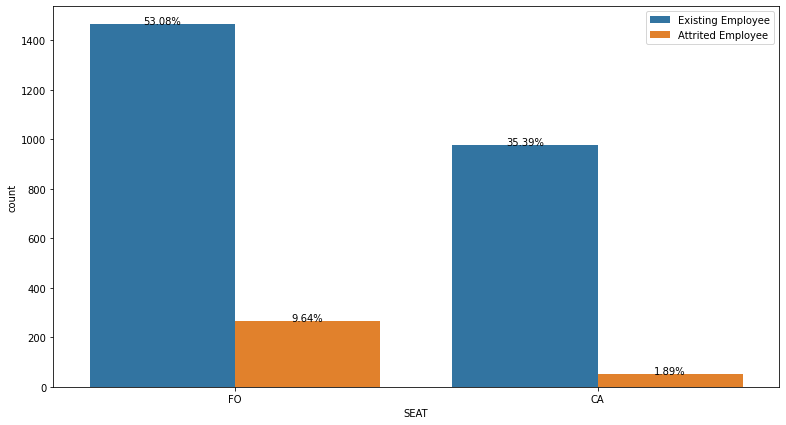

In [14]:
fig, axis = plt.subplots(figsize=(13,7)) # Assigning the Plot size
ax=sns.countplot(x='SEAT',data=df, hue='CURRENT_STATUS') # Taking the X and Y axis of the plot
ax.legend(bbox_to_anchor=(1, 1),labels=["Existing Employee","Attrited Employee"]) # Defining the Legends.

for p in ax.patches: # A loop to show the values in Percentage for the Bar Plots.
  ax.text(p.get_x()+p.get_width()/2# to center the % value on the bar chart at the top by X axis
          ,p.get_height() # to show the Y position of the percentage value
          ,'{:1.2f}%'.format(p.get_height()/len(df)*100) # To calculate the Percentage value for easy representation
          ,ha="center" # To centralize the Whole texting of the % value.
          )

We see that there are more FO range employees compared to CA and also the attrition was more in the FO range employees with 9.64%.

## Outliers Exploration

In [15]:
numerics = df.select_dtypes(include=np.number).columns.tolist()
numericVariables = numerics.copy()
continousVariables = numerics.copy()
for i in ['FLEET']:
    continousVariables.remove(i)
print(continousVariables)

['CURRENT_STATUS', 'CHANGEINTRIPCOUNT', 'CHANGE_IN_HOURS', 'CURRENT_AGE', 'CHANGEINOFFDUTY', 'CHANGEINRESERVE', 'CHANGEINTRAINING', 'CHANGEINDHTIME', 'CHANGEINDHCOUNT', 'AVG_DELAY', 'AVG_NO_OF_DELAYS', 'AVG_FLIGHT_BLOCKHOURS', 'CONTRACTS_WORKED', 'LATENIGHT', 'TRIPLENGTH', 'TOTAL_LAYOVERS', 'INT_COUNT', 'DOM_COUNT']


In [16]:
from collections import Counter
def decet_outlier(df,features):
    """
    Decet outlier rows for given df and columns for %25 and %75 percentiles
    
    df: Pandas DataFrame
    
    features: Column name
    
    """
    
    outlier_indeces = []
    
    for c in features:
        
        #Q1 Calculation
        
        Q1 = np.percentile(df[c],25)


        #Q3 Calculation
        
        Q3 = np.percentile(df[c],75)

        #IQR Calculation
        
        IQR = Q3-Q1
        
        #Outlier Step
        
        outlier_step = IQR * 1.5
        
        #Detect outlier and their indeces
        
        outlier_list_col = df[(df[c]< Q1 - outlier_step) | (df[c]> Q3 + outlier_step)].index
        
        #Store indeces
        
        outlier_indeces.extend(outlier_list_col)
        
        outlier_indeces = Counter(outlier_indeces)
        multiple_outliers = list(i for i, v in outlier_indeces.items() if v > 2)
    
        return multiple_outliers

In [17]:
df.loc[decet_outlier(df,[continousVariables])]

,CURRENT_STATUS,CHANGEINTRIPCOUNT,CHANGE_IN_HOURS,CURRENT_AGE,FLEET,SEAT,CHANGEINOFFDUTY,CHANGEINRESERVE,CHANGEINTRAINING,CHANGEINDHTIME,CHANGEINDHCOUNT,AVG_DELAY,AVG_NO_OF_DELAYS,AVG_FLIGHT_BLOCKHOURS,CONTRACTS_WORKED,LATENIGHT,TRIPLENGTH,TOTAL_LAYOVERS,INT_COUNT,DOM_COUNT


In [18]:
df.isnull().any()

CURRENT_STATUS           False
CHANGEINTRIPCOUNT        False
CHANGE_IN_HOURS          False
CURRENT_AGE              False
FLEET                    False
SEAT                     False
CHANGEINOFFDUTY          False
CHANGEINRESERVE          False
CHANGEINTRAINING         False
CHANGEINDHTIME           False
CHANGEINDHCOUNT          False
AVG_DELAY                False
AVG_NO_OF_DELAYS         False
AVG_FLIGHT_BLOCKHOURS    False
CONTRACTS_WORKED         False
LATENIGHT                False
TRIPLENGTH               False
TOTAL_LAYOVERS           False
INT_COUNT                False
DOM_COUNT                False
dtype: bool

## Continuous Variables Exploration
---
In this section, we will be exploring all the Continuous Variables to find on their distribution and also if there is any need for transformation. 

In [19]:
def plot_hist(df,variable):
    var = df[variable]
    plt.figure(figsize = (9,3))
    sns.histplot(var,bins = 50,kde=True)
    plt.ylabel("Frequency")
    plt.xlabel(variable)
    plt.title("{} Distribituon with hist".format(variable))
    plt.show()

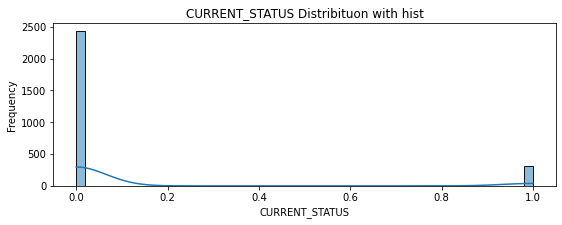

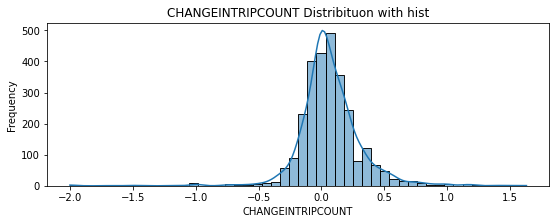

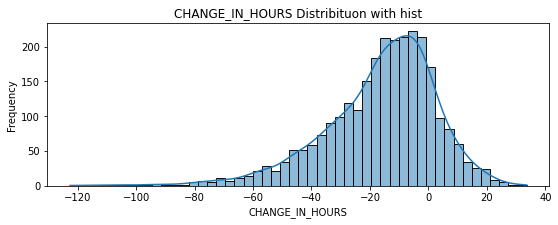

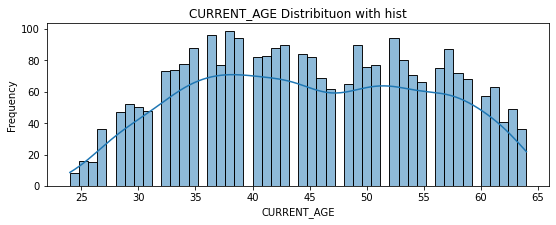

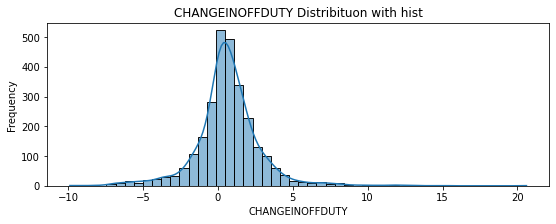

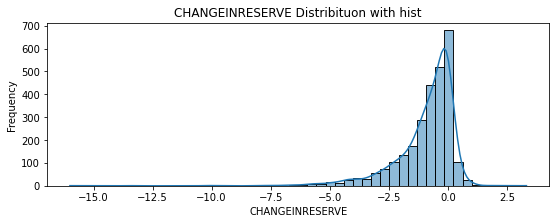

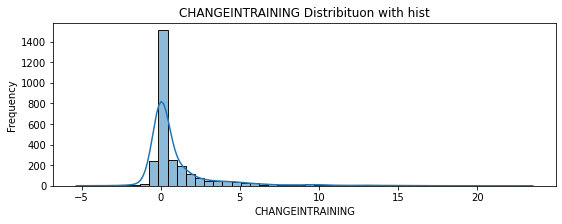

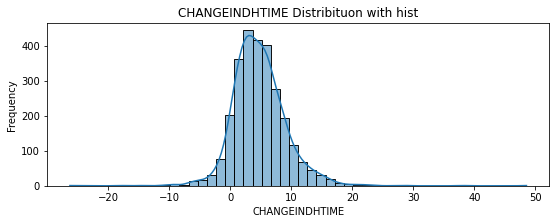

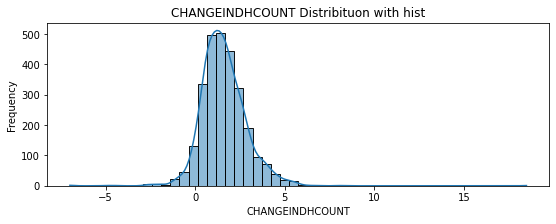

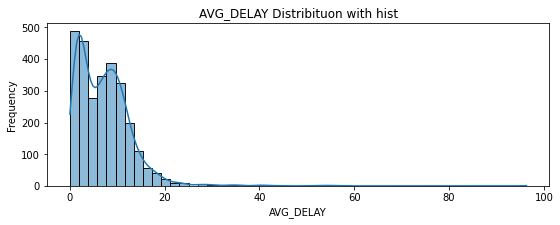

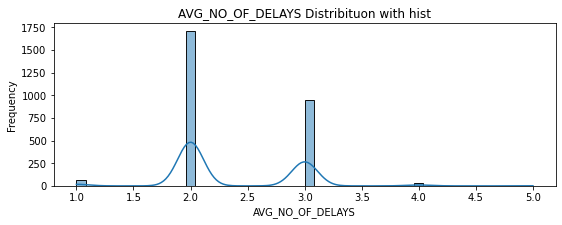

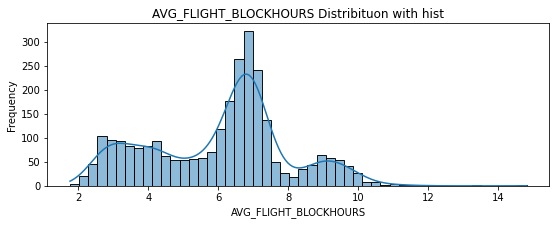

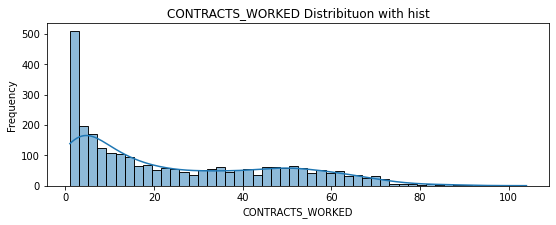

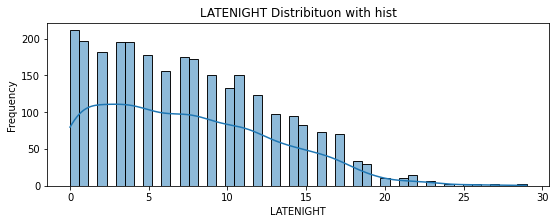

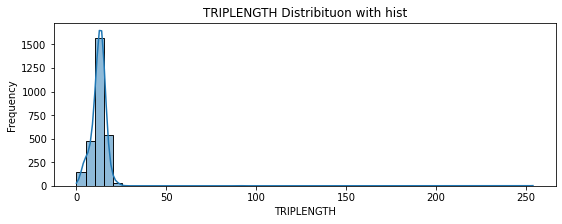

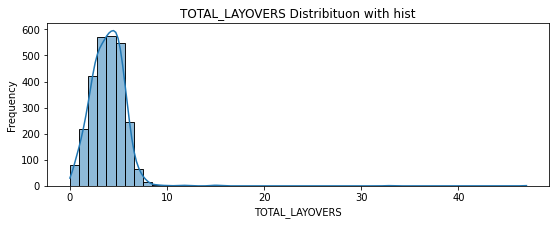

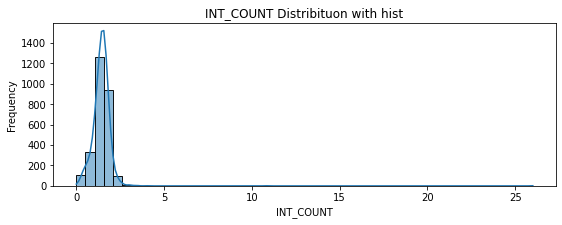

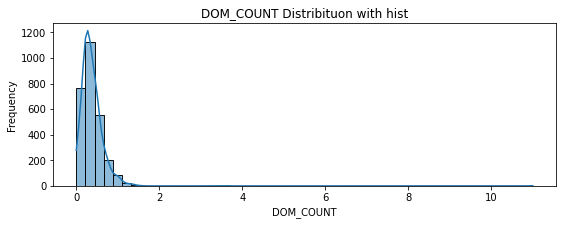

In [20]:
for var in continousVariables:
    plot_hist(df,var)

As can be seen from the above graphs, all the variables are having a normal distribution and hence can be statistically significant for modeling. 

In [21]:
# plt.figure(figsize=(8,5))
# plt.suptitle("Distribution before Capping", fontsize=10)
# plt.subplot(1,2,1)
# sns.kdeplot(data = df['CHANGEINTRIPCOUNT'], palette="cool")
# plt.subplot(1,2,2)
# sns.boxplot(data = df['CHANGEINTRIPCOUNT'], palette="Dark2")
# plt.show()

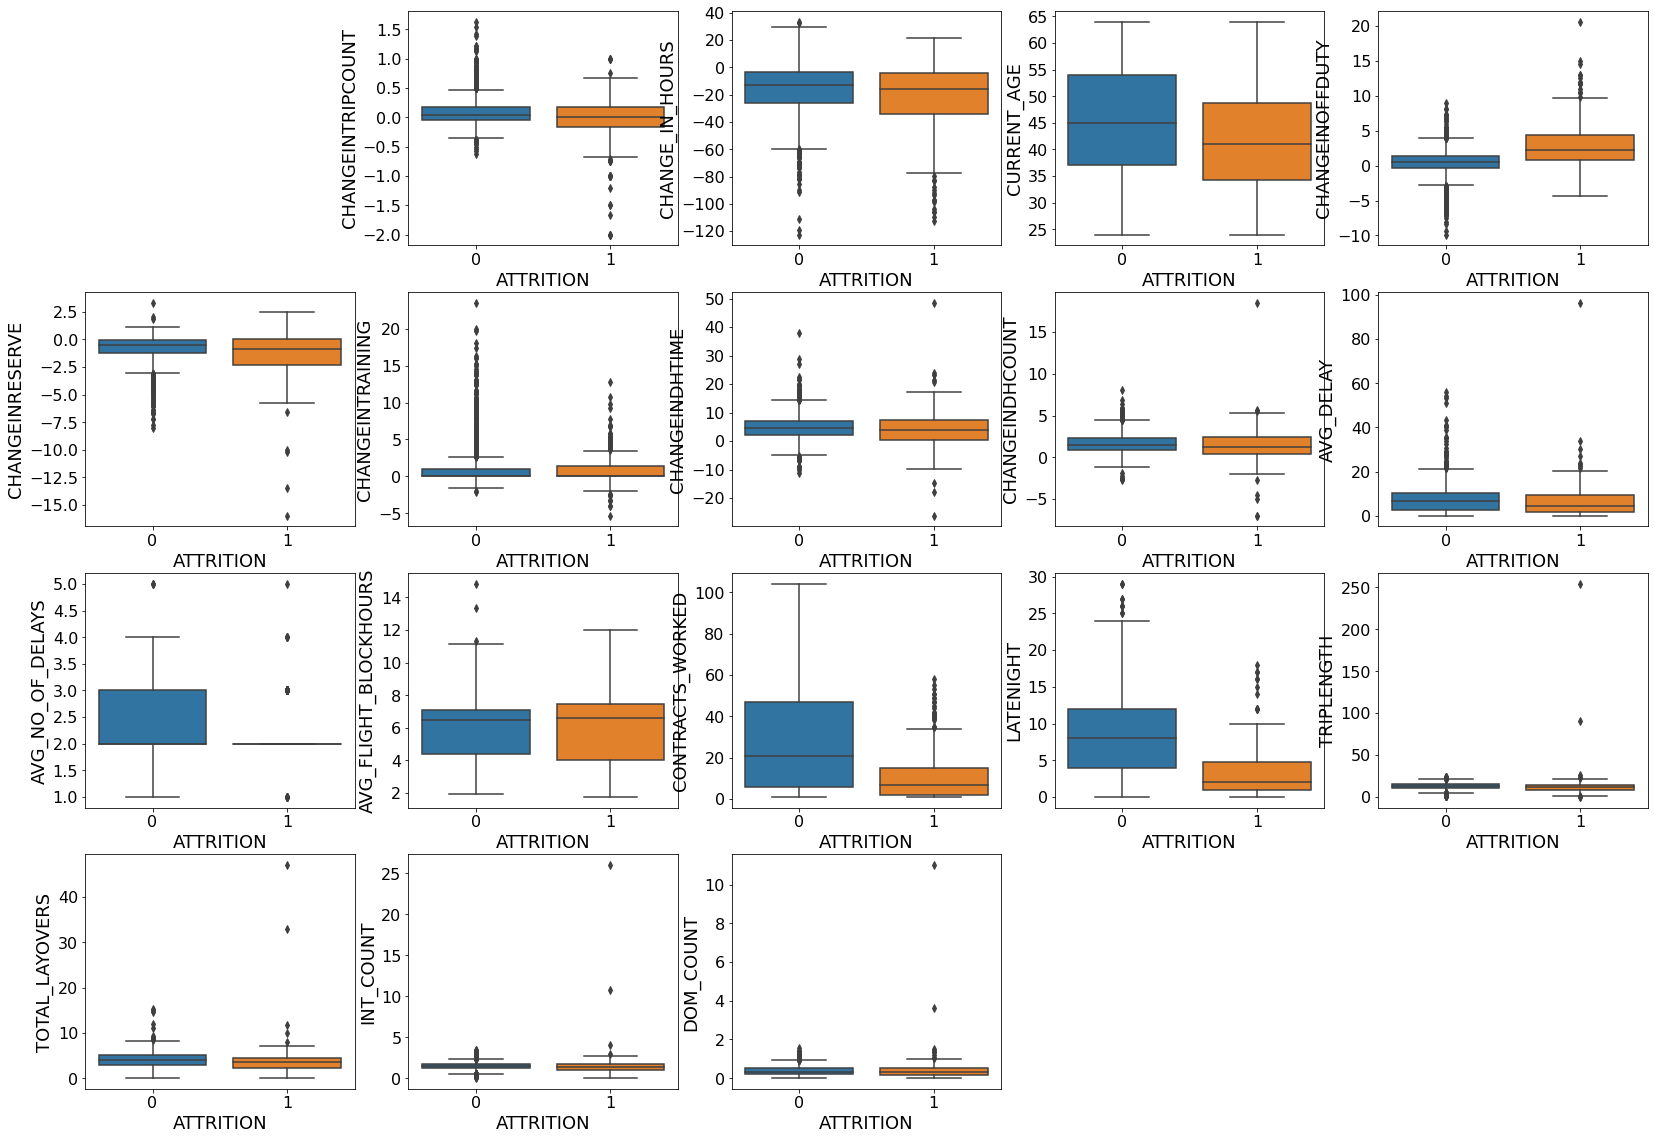

In [22]:
plt.figure(figsize=(28, 25))
for i in range(1,len(continousVariables) ):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(x='CURRENT_STATUS', y=continousVariables[i], data=df)
    plt.xlabel('ATTRITION', fontsize=18)
    plt.ylabel(continousVariables[i], fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    

plt.show()

When we validated the Continuous variables with respect for the attrition variables, we can see that there are many outliers based on the Box Plot analysis. Hence we will need to transform these variables and make sure there are no or less outliers. 

# **Modify**
---
In this section, we will work on the transformation of the variables and also work on the handling of Imbalance of the dataset.

So, we will start with capping of the Continuous variables where we have seen in the box plot analysis that there were lot of records outside of the lower and Upper whiskers. 

#### Change in Trip Count Transformation 

In [23]:
# for i in req_transformation:

#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df["CHANGEINTRIPCOUNT"].quantile(0.25)
q2 = df["CHANGEINTRIPCOUNT"].quantile(0.75)

#finding out the value of Inter Quartile Range
IQR = q2 - q1

#defining max and min limits
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR) 

#capping
df['CHANGEINTRIPCOUNT_TRAN'] = pd.DataFrame(np.where(df["CHANGEINTRIPCOUNT"] > max_limit, max_limit, 
         (np.where(df["CHANGEINTRIPCOUNT"] < min_limit, min_limit, df["CHANGEINTRIPCOUNT"]))), columns=["CHANGEINTRIPCOUNT"])

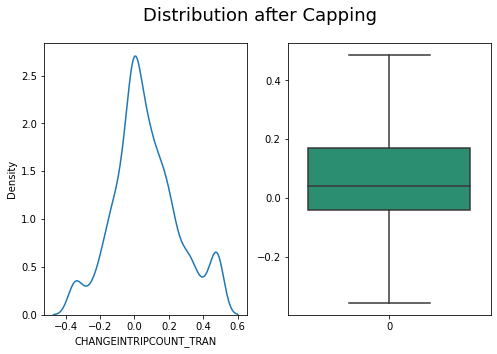

In [24]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution after Capping", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df['CHANGEINTRIPCOUNT_TRAN'], palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = df['CHANGEINTRIPCOUNT_TRAN'], palette="Dark2")
plt.show()

#### Change in Hours Transformation

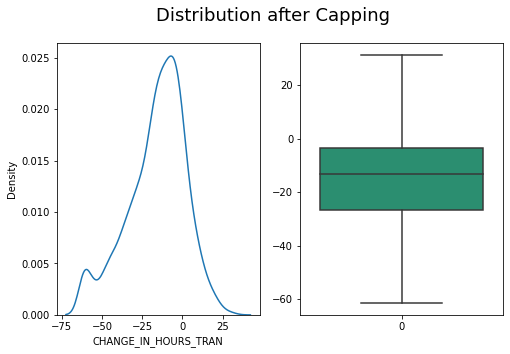

In [25]:
# for i in req_transformation:

#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df["CHANGE_IN_HOURS"].quantile(0.25)
q2 = df["CHANGE_IN_HOURS"].quantile(0.75)

#finding out the value of Inter Quartile Range
IQR = q2 - q1

#defining max and min limits
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR) 

#capping
df['CHANGE_IN_HOURS_TRAN'] = pd.DataFrame(np.where(df["CHANGE_IN_HOURS"] > max_limit, max_limit, 
         (np.where(df["CHANGE_IN_HOURS"] < min_limit, min_limit, df["CHANGE_IN_HOURS"]))), columns=["CHANGE_IN_HOURS"])

plt.figure(figsize=(8,5))
plt.suptitle("Distribution after Capping", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df['CHANGE_IN_HOURS_TRAN'], palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = df['CHANGE_IN_HOURS_TRAN'], palette="Dark2")
plt.show()

#### Change in OFFDUTY

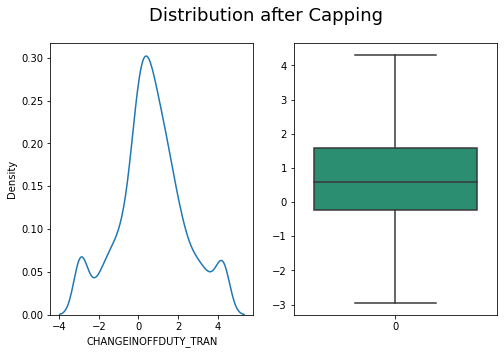

In [26]:
# for i in req_transformation:

#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df["CHANGEINOFFDUTY"].quantile(0.25)
q2 = df["CHANGEINOFFDUTY"].quantile(0.75)

#finding out the value of Inter Quartile Range
IQR = q2 - q1

#defining max and min limits
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR) 

#capping
df['CHANGEINOFFDUTY_TRAN'] = pd.DataFrame(np.where(df["CHANGEINOFFDUTY"] > max_limit, max_limit, 
         (np.where(df["CHANGEINOFFDUTY"] < min_limit, min_limit, df["CHANGEINOFFDUTY"]))), columns=["CHANGEINOFFDUTY"])

plt.figure(figsize=(8,5))
plt.suptitle("Distribution after Capping", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df['CHANGEINOFFDUTY_TRAN'], palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = df['CHANGEINOFFDUTY_TRAN'], palette="Dark2")
plt.show()

#### Change in Reserve

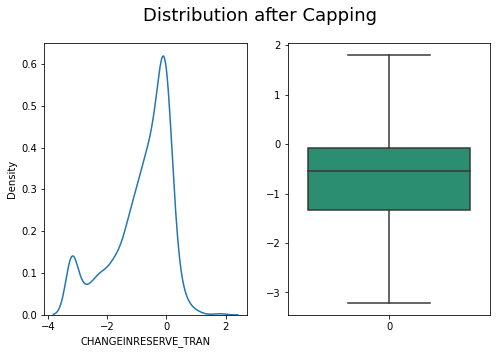

In [27]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df["CHANGEINRESERVE"].quantile(0.25)
q2 = df["CHANGEINRESERVE"].quantile(0.75)

#finding out the value of Inter Quartile Range
IQR = q2 - q1

#defining max and min limits
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR) 

#capping
df['CHANGEINRESERVE_TRAN'] = pd.DataFrame(np.where(df["CHANGEINRESERVE"] > max_limit, max_limit, 
         (np.where(df["CHANGEINRESERVE"] < min_limit, min_limit, df["CHANGEINRESERVE"]))), columns=["CHANGEINRESERVE"])

plt.figure(figsize=(8,5))
plt.suptitle("Distribution after Capping", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df['CHANGEINRESERVE_TRAN'], palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = df['CHANGEINRESERVE_TRAN'], palette="Dark2")
plt.show()

#### Change in Training

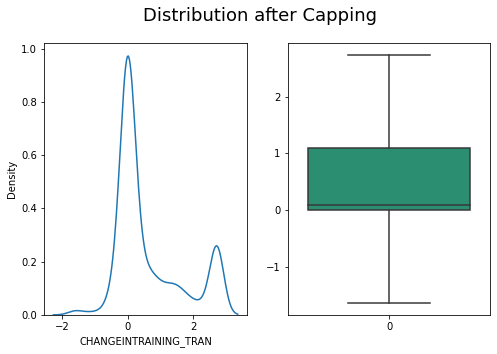

In [28]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df["CHANGEINTRAINING"].quantile(0.25)
q2 = df["CHANGEINTRAINING"].quantile(0.75)

#finding out the value of Inter Quartile Range
IQR = q2 - q1

#defining max and min limits
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR) 

#capping
df['CHANGEINTRAINING_TRAN'] = pd.DataFrame(np.where(df["CHANGEINTRAINING"] > max_limit, max_limit, 
         (np.where(df["CHANGEINTRAINING"] < min_limit, min_limit, df["CHANGEINTRAINING"]))), columns=["CHANGEINTRAINING"])

plt.figure(figsize=(8,5))
plt.suptitle("Distribution after Capping", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df['CHANGEINTRAINING_TRAN'], palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = df['CHANGEINTRAINING_TRAN'], palette="Dark2")
plt.show()

#### Change in Dead Head Time

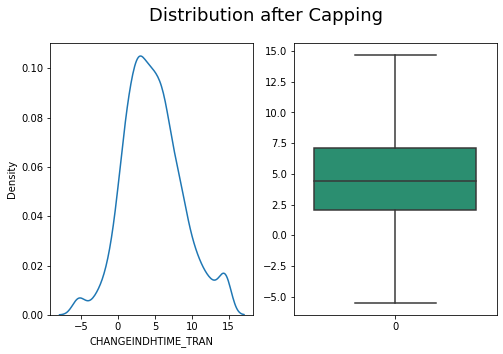

In [29]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df["CHANGEINDHTIME"].quantile(0.25)
q2 = df["CHANGEINDHTIME"].quantile(0.75)

#finding out the value of Inter Quartile Range
IQR = q2 - q1

#defining max and min limits
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR) 

#capping
df['CHANGEINDHTIME_TRAN'] = pd.DataFrame(np.where(df["CHANGEINDHTIME"] > max_limit, max_limit, 
         (np.where(df["CHANGEINDHTIME"] < min_limit, min_limit, df["CHANGEINDHTIME"]))), columns=["CHANGEINDHTIME"])

plt.figure(figsize=(8,5))
plt.suptitle("Distribution after Capping", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df['CHANGEINDHTIME_TRAN'], palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = df['CHANGEINDHTIME_TRAN'], palette="Dark2")
plt.show()

#### Change in Average Delays

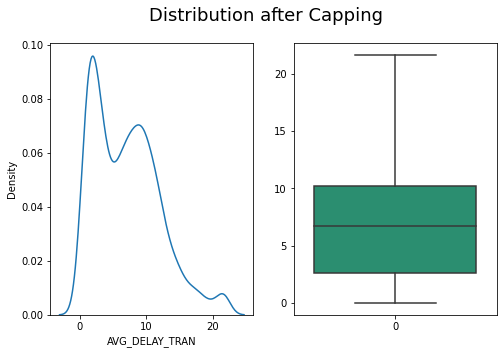

In [30]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df["AVG_DELAY"].quantile(0.25)
q2 = df["AVG_DELAY"].quantile(0.75)

#finding out the value of Inter Quartile Range
IQR = q2 - q1

#defining max and min limits
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR) 

#capping
df['AVG_DELAY_TRAN'] = pd.DataFrame(np.where(df["AVG_DELAY"] > max_limit, max_limit, 
         (np.where(df["AVG_DELAY"] < min_limit, min_limit, df["AVG_DELAY"]))), columns=["AVG_DELAY"])

plt.figure(figsize=(8,5))
plt.suptitle("Distribution after Capping", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df['AVG_DELAY_TRAN'], palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = df['AVG_DELAY_TRAN'], palette="Dark2")
plt.show()

#### Change in Average Number of Delays

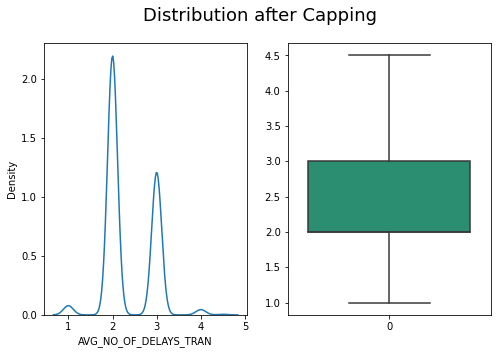

In [31]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df["AVG_NO_OF_DELAYS"].quantile(0.25)
q2 = df["AVG_NO_OF_DELAYS"].quantile(0.75)

#finding out the value of Inter Quartile Range
IQR = q2 - q1

#defining max and min limits
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR) 

#capping
df['AVG_NO_OF_DELAYS_TRAN'] = pd.DataFrame(np.where(df["AVG_NO_OF_DELAYS"] > max_limit, max_limit, 
         (np.where(df["AVG_NO_OF_DELAYS"] < min_limit, min_limit, df["AVG_NO_OF_DELAYS"]))), columns=["AVG_NO_OF_DELAYS"])

plt.figure(figsize=(8,5))
plt.suptitle("Distribution after Capping", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df['AVG_NO_OF_DELAYS_TRAN'], palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = df['AVG_NO_OF_DELAYS_TRAN'], palette="Dark2")
plt.show()

#### Late Night 

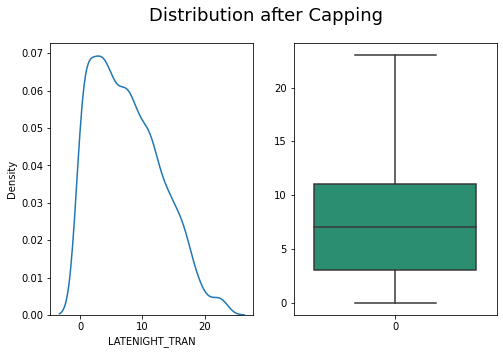

In [32]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df["LATENIGHT"].quantile(0.25)
q2 = df["LATENIGHT"].quantile(0.75)

#finding out the value of Inter Quartile Range
IQR = q2 - q1

#defining max and min limits
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR) 

#capping
df['LATENIGHT_TRAN'] = pd.DataFrame(np.where(df["LATENIGHT"] > max_limit, max_limit, 
         (np.where(df["LATENIGHT"] < min_limit, min_limit, df["LATENIGHT"]))), columns=["LATENIGHT"])

plt.figure(figsize=(8,5))
plt.suptitle("Distribution after Capping", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df['LATENIGHT_TRAN'], palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = df['LATENIGHT_TRAN'], palette="Dark2")
plt.show()

#### Domestic Travel Count

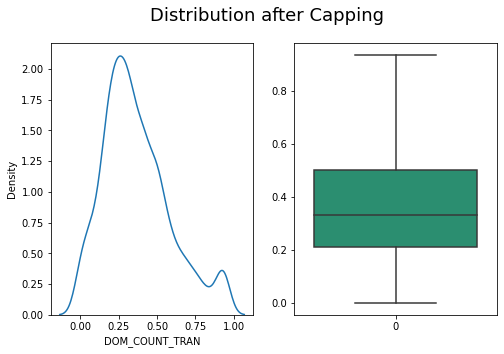

In [33]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df["DOM_COUNT"].quantile(0.25)
q2 = df["DOM_COUNT"].quantile(0.75)

#finding out the value of Inter Quartile Range
IQR = q2 - q1

#defining max and min limits
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR) 

#capping
df['DOM_COUNT_TRAN'] = pd.DataFrame(np.where(df["DOM_COUNT"] > max_limit, max_limit, 
         (np.where(df["DOM_COUNT"] < min_limit, min_limit, df["DOM_COUNT"]))), columns=["DOM_COUNT"])

plt.figure(figsize=(8,5))
plt.suptitle("Distribution after Capping", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df['DOM_COUNT_TRAN'], palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = df['DOM_COUNT_TRAN'], palette="Dark2")
plt.show()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2758 entries, 0 to 2757
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CURRENT_STATUS          2758 non-null   int64  
 1   CHANGEINTRIPCOUNT       2758 non-null   float64
 2   CHANGE_IN_HOURS         2758 non-null   float64
 3   CURRENT_AGE             2758 non-null   int64  
 4   FLEET                   2758 non-null   int64  
 5   SEAT                    2758 non-null   object 
 6   CHANGEINOFFDUTY         2758 non-null   float64
 7   CHANGEINRESERVE         2758 non-null   float64
 8   CHANGEINTRAINING        2758 non-null   float64
 9   CHANGEINDHTIME          2758 non-null   float64
 10  CHANGEINDHCOUNT         2758 non-null   float64
 11  AVG_DELAY               2758 non-null   float64
 12  AVG_NO_OF_DELAYS        2758 non-null   int64  
 13  AVG_FLIGHT_BLOCKHOURS   2758 non-null   float64
 14  CONTRACTS_WORKED        2758 non-null   

In [35]:
# Dropping of original variables
df_model = df.drop(['CHANGEINDHCOUNT','CHANGEINTRIPCOUNT','CHANGE_IN_HOURS', 'CHANGEINOFFDUTY', 'CHANGEINRESERVE', 'CHANGEINTRAINING', 'CHANGEINDHTIME',
'AVG_DELAY', 'AVG_NO_OF_DELAYS','LATENIGHT'],axis=1)
df_model.head()


,CURRENT_STATUS,CURRENT_AGE,FLEET,SEAT,AVG_FLIGHT_BLOCKHOURS,CONTRACTS_WORKED,TRIPLENGTH,TOTAL_LAYOVERS,INT_COUNT,DOM_COUNT,CHANGEINTRIPCOUNT_TRAN,CHANGE_IN_HOURS_TRAN,CHANGEINOFFDUTY_TRAN,CHANGEINRESERVE_TRAN,CHANGEINTRAINING_TRAN,CHANGEINDHTIME_TRAN,AVG_DELAY_TRAN,AVG_NO_OF_DELAYS_TRAN,LATENIGHT_TRAN,DOM_COUNT_TRAN
0,1,39,767,FO,4.75,13,14.56,3.78,1.44,0.56,0.440,-5.78000,-1.22000,0.440,0.110,2.95,10.79,2.0,4.0,0.56
1,1,64,747,CA,6.35,10,9.00,2.33,1.00,0.00,-0.355,-41.86000,4.29125,0.670,-1.635,-1.18,12.21,2.0,2.0,0.00
2,1,37,747,FO,6.61,12,10.70,4.00,1.10,0.40,0.200,-61.31625,0.90000,-1.600,2.725,14.57,11.43,3.0,3.0,0.40
3,1,43,747,FO,7.39,12,15.00,4.33,1.83,0.17,0.170,-61.31625,3.33000,-3.205,0.000,14.65,6.88,2.0,4.0,0.17
4,1,48,747,FO,6.94,14,10.88,3.75,1.50,0.00,0.000,-26.98000,3.75000,-2.500,0.000,3.91,7.90,2.0,4.0,0.00


In [36]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2758 entries, 0 to 2757
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CURRENT_STATUS          2758 non-null   int64  
 1   CURRENT_AGE             2758 non-null   int64  
 2   FLEET                   2758 non-null   int64  
 3   SEAT                    2758 non-null   object 
 4   AVG_FLIGHT_BLOCKHOURS   2758 non-null   float64
 5   CONTRACTS_WORKED        2758 non-null   int64  
 6   TRIPLENGTH              2758 non-null   float64
 7   TOTAL_LAYOVERS          2758 non-null   float64
 8   INT_COUNT               2758 non-null   float64
 9   DOM_COUNT               2758 non-null   float64
 10  CHANGEINTRIPCOUNT_TRAN  2758 non-null   float64
 11  CHANGE_IN_HOURS_TRAN    2758 non-null   float64
 12  CHANGEINOFFDUTY_TRAN    2758 non-null   float64
 13  CHANGEINRESERVE_TRAN    2758 non-null   float64
 14  CHANGEINTRAINING_TRAN   2758 non-null   

## Making Indicator columns for Categorical Variables

In [37]:
cat_cols = ['FLEET','SEAT']

In [38]:
for col in cat_cols:
    dummy_cols = pd.get_dummies(df_model[col], drop_first=True, prefix=col)
    df_model = pd.concat([df_model,dummy_cols],axis=1)
    df_model.drop(columns=col, inplace=True)

In [39]:
df_model.head()

,CURRENT_STATUS,CURRENT_AGE,AVG_FLIGHT_BLOCKHOURS,CONTRACTS_WORKED,TRIPLENGTH,TOTAL_LAYOVERS,INT_COUNT,DOM_COUNT,CHANGEINTRIPCOUNT_TRAN,CHANGE_IN_HOURS_TRAN,CHANGEINOFFDUTY_TRAN,CHANGEINRESERVE_TRAN,CHANGEINTRAINING_TRAN,CHANGEINDHTIME_TRAN,AVG_DELAY_TRAN,AVG_NO_OF_DELAYS_TRAN,LATENIGHT_TRAN,DOM_COUNT_TRAN,FLEET_747,FLEET_767,FLEET_777,SEAT_FO
0,1,39,4.75,13,14.56,3.78,1.44,0.56,0.440,-5.78000,-1.22000,0.440,0.110,2.95,10.79,2.0,4.0,0.56,0,1,0,1
1,1,64,6.35,10,9.00,2.33,1.00,0.00,-0.355,-41.86000,4.29125,0.670,-1.635,-1.18,12.21,2.0,2.0,0.00,1,0,0,0
2,1,37,6.61,12,10.70,4.00,1.10,0.40,0.200,-61.31625,0.90000,-1.600,2.725,14.57,11.43,3.0,3.0,0.40,1,0,0,1
3,1,43,7.39,12,15.00,4.33,1.83,0.17,0.170,-61.31625,3.33000,-3.205,0.000,14.65,6.88,2.0,4.0,0.17,1,0,0,1
4,1,48,6.94,14,10.88,3.75,1.50,0.00,0.000,-26.98000,3.75000,-2.500,0.000,3.91,7.90,2.0,4.0,0.00,1,0,0,1


In [40]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2758 entries, 0 to 2757
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CURRENT_STATUS          2758 non-null   int64  
 1   CURRENT_AGE             2758 non-null   int64  
 2   AVG_FLIGHT_BLOCKHOURS   2758 non-null   float64
 3   CONTRACTS_WORKED        2758 non-null   int64  
 4   TRIPLENGTH              2758 non-null   float64
 5   TOTAL_LAYOVERS          2758 non-null   float64
 6   INT_COUNT               2758 non-null   float64
 7   DOM_COUNT               2758 non-null   float64
 8   CHANGEINTRIPCOUNT_TRAN  2758 non-null   float64
 9   CHANGE_IN_HOURS_TRAN    2758 non-null   float64
 10  CHANGEINOFFDUTY_TRAN    2758 non-null   float64
 11  CHANGEINRESERVE_TRAN    2758 non-null   float64
 12  CHANGEINTRAINING_TRAN   2758 non-null   float64
 13  CHANGEINDHTIME_TRAN     2758 non-null   float64
 14  AVG_DELAY_TRAN          2758 non-null   

## Target Variable Imbalance

We see that the Ratio of 1 to 0 for Attrition Column is very biased. The ratio is 12:88 which ideally will give us biased results. 

A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary. The imbalance in the distribution of target categories can lead to a pretty high accuracy just by predicting the majority class, but fail to capture the minority class, which is actually the class of interest and the point of creating the model in the first place. Thus, there is a need to balance the data before modeling.

There are 2 methods followed - Undersampling or Over Sampling

In under-sampling, there will be removal of data from Majority class to match the minority class records which ideally means that not all the records are being considered for the analysis and model prediction. Hence, this method is of less scope for us as we will need to include all the records and then create attrition model.

Thus, the preferred technique is Oversampling. SMOTE (Synthetic Minority Oversampling Technique) randomly picks a point from the minority class and computes the k-nearest neighbors for this point. These points are added between the chosen point and its neighbors thereby creating synthetic data for the minority class.

References: https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/

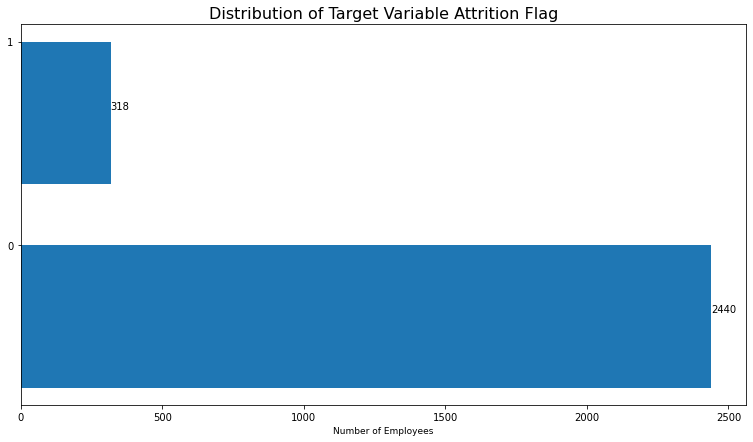

In [41]:
import matplotlib.pyplot as plt

# Bar chart for distriution of Target variable 
a = df.CURRENT_STATUS.value_counts()

x = list(a.index)
y = list(a)
fig, ax = plt.subplots(figsize=(13, 7))
 
width = 0.7 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width)
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
    ax.text(v + .15, i + .02, str(v), color='Black') #add value labels into bar
plt.xlabel('Number of Employees', fontsize = 9)
plt.title('Distribution of Target Variable Attrition Flag', fontsize = 16)
plt.show()

In [42]:
df_model['CURRENT_STATUS'].value_counts() #  to quickly show the distribution in numbers

0    2440
1     318
Name: CURRENT_STATUS, dtype: int64

### Handling of Imbalance

In [43]:
# oversampling 
# import random oversampling and other necessary libraries 
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [44]:
# Dropping of variables as mentioned in the above. 'CHANGEINTRIPCOUNT_TRAN','CHANGEINRESERVE_TRAN' are dropped as they have P value 
# greater than 0.05 while validating the model in the Logit regression results.
X = df_model.drop(['CURRENT_STATUS','CHANGEINTRIPCOUNT_TRAN','CHANGEINRESERVE_TRAN','TRIPLENGTH'],axis=1)
y = df_model['CURRENT_STATUS']
X

,CURRENT_AGE,AVG_FLIGHT_BLOCKHOURS,CONTRACTS_WORKED,TOTAL_LAYOVERS,INT_COUNT,DOM_COUNT,CHANGE_IN_HOURS_TRAN,CHANGEINOFFDUTY_TRAN,CHANGEINTRAINING_TRAN,CHANGEINDHTIME_TRAN,AVG_DELAY_TRAN,AVG_NO_OF_DELAYS_TRAN,LATENIGHT_TRAN,DOM_COUNT_TRAN,FLEET_747,FLEET_767,FLEET_777,SEAT_FO
0,39,4.75,13,3.78,1.44,0.56,-5.78000,-1.22000,0.110,2.95,10.79,2.0,4.0,0.56,0,1,0,1
1,64,6.35,10,2.33,1.00,0.00,-41.86000,4.29125,-1.635,-1.18,12.21,2.0,2.0,0.00,1,0,0,0
2,37,6.61,12,4.00,1.10,0.40,-61.31625,0.90000,2.725,14.57,11.43,3.0,3.0,0.40,1,0,0,1
3,43,7.39,12,4.33,1.83,0.17,-61.31625,3.33000,0.000,14.65,6.88,2.0,4.0,0.17,1,0,0,1
4,48,6.94,14,3.75,1.50,0.00,-26.98000,3.75000,0.000,3.91,7.90,2.0,4.0,0.00,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2753,30,5.48,9,3.31,1.31,0.38,-5.35000,1.31000,1.460,2.54,4.08,2.0,2.0,0.38,0,1,0,1
2754,64,6.57,51,4.46,1.50,0.25,-12.40000,0.71000,0.080,6.49,8.98,3.0,14.0,0.25,1,0,0,0
2755,41,7.22,56,5.92,1.83,0.33,0.91000,0.04000,0.080,1.54,7.84,3.0,14.0,0.33,1,0,0,1
2756,60,6.32,52,3.79,1.25,0.33,-7.29000,2.46000,0.040,6.25,18.34,3.0,9.0,0.33,1,0,0,0


In [45]:
#Split train-test data - We are dividing the data into Training and Test in the ration of 70:30
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

Text(0, 0.5, 'Frequency')

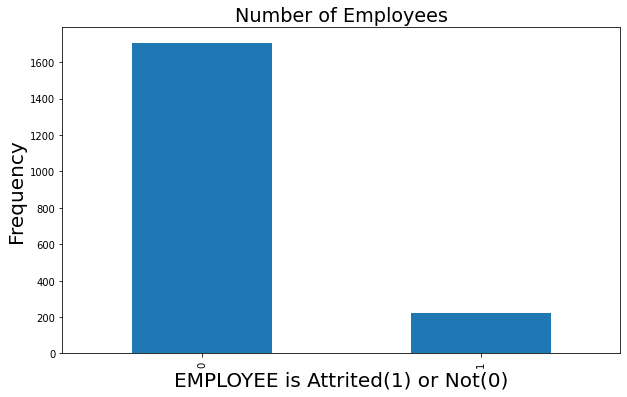

In [46]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(13, 7))

plt.rcParams['font.size'] = '16'
ax = y_train.value_counts().plot(kind='bar',figsize=(10,6),title="Number of Employees")

#matplotlib.rc('font', **font)
ax.set_xlabel("EMPLOYEE is Attrited(1) or Not(0)",fontsize =20)
ax.set_ylabel("Frequency" , fontsize = 20)

In [47]:
from sklearn.preprocessing import MaxAbsScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
### Scale the data before applying SMOTE
sm = SMOTE(random_state=42, n_jobs=8, sampling_strategy=1)
### Resample X_train_scaled
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_train_SMOTE))
y_pd = pd.DataFrame(y_train_SMOTE)
y_pd

original dataset shape: Counter({0: 1706, 1: 224})
Resample dataset shape Counter({0: 1706, 1: 1706})


,CURRENT_STATUS
0,0
1,0
2,0
3,0
4,0
...,...
3407,1
3408,1
3409,1
3410,1


Text(0, 0.5, 'Frequency')

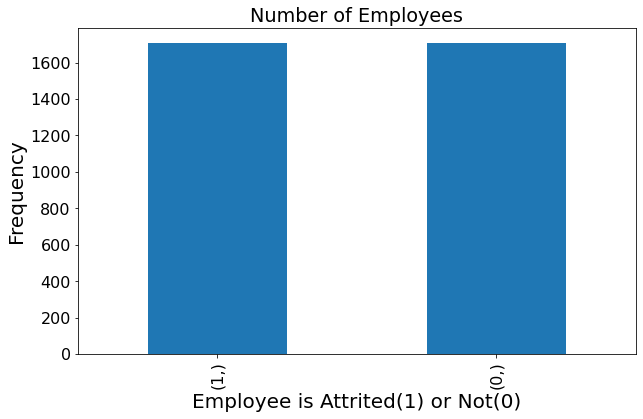

In [48]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(13, 7))

plt.rcParams['font.size'] = '16'
ax = y_pd.value_counts().plot(kind='bar',figsize=(10,6),title="Number of Employees")

#matplotlib.rc('font', **font)
ax.set_xlabel("Employee is Attrited(1) or Not(0)",fontsize =20)
ax.set_ylabel("Frequency" , fontsize = 20)

We have done Oversampling after splitting the data to Train and Test. 
Then, we have applied over sampling only on training data but not on Test Data. 

# **Modeling**

### **Logistic Regression**



In [49]:
# Logistic Regression with oversampled data
model_logistic = LogisticRegression(max_iter=10000, random_state=42)
model_logistic.fit(X_train_SMOTE,y_train_SMOTE)
y_pred_logistic = model_logistic.predict(X_test)

In [50]:
accuracy_logistic = accuracy_score(y_pred_logistic,y_test)*100
print('\nAccuracy:',accuracy_logistic)

precision_logistic = metrics.precision_score(y_test, y_pred_logistic)
print("\nPrecision:",precision_logistic)

recall_logistic = metrics.recall_score(y_test, y_pred_logistic)
print("\nRecall:",recall_logistic)

cm_logistic = confusion_matrix(y_test, y_pred_logistic)
print('\nConfusionMatrix:\n', confusion_matrix(y_test, y_pred_logistic))

print('\nClassification_report:\n',classification_report(y_test,y_pred_logistic))


Accuracy: 82.487922705314

Precision: 0.3621621621621622

Recall: 0.7127659574468085

ConfusionMatrix:
 [[616 118]
 [ 27  67]]

Classification_report:
               precision    recall  f1-score   support

           0       0.96      0.84      0.89       734
           1       0.36      0.71      0.48        94

    accuracy                           0.82       828
   macro avg       0.66      0.78      0.69       828
weighted avg       0.89      0.82      0.85       828



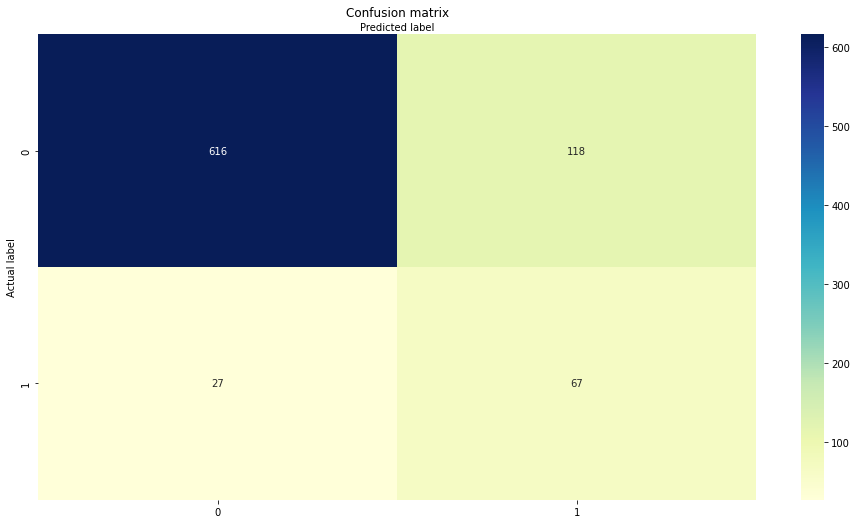

In [51]:
# Import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(13,7))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_logistic), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [52]:
od=pd.DataFrame({'odds_ratio':(np.exp(model_logistic.coef_).T).tolist(),'variable':X_train.columns.tolist()})
od['odds_ratio'] = od['odds_ratio'].str.get(0)
od=od.sort_values('odds_ratio', ascending=False)
od

,odds_ratio,variable
4,5.834932,INT_COUNT
7,1.893836,CHANGEINOFFDUTY_TRAN
5,1.738159,DOM_COUNT
1,1.695209,AVG_FLIGHT_BLOCKHOURS
10,1.093586,AVG_DELAY_TRAN
9,1.085503,CHANGEINDHTIME_TRAN
6,0.987420,CHANGE_IN_HOURS_TRAN
0,0.977285,CURRENT_AGE
2,0.938965,CONTRACTS_WORKED
3,0.845626,TOTAL_LAYOVERS



Below logit regression results are used to validate the P values and perform iterations on which columns needs to be used and which need not be used.

In [53]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train_SMOTE,X_train_SMOTE)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.362850
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         CURRENT_STATUS   No. Observations:                 3412
Model:                          Logit   Df Residuals:                     3394
Method:                           MLE   Df Model:                           17
Date:                Sat, 11 Dec 2021   Pseudo R-squ.:                  0.4765
Time:                        19:58:50   Log-Likelihood:                -1238.0
converged:                       True   LL-Null:                       -2365.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
CURRENT_AGE              -0.0306      0.005     -6.283      0.000      -0.040      -0.

## **Decision Tree**


In [54]:
# Decision Tree with Oversampled Data
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
model_DecTree = DecisionTreeClassifier(random_state=42,max_depth=5)

# Train Decision Tree Classifer
model_DecTree = model_DecTree.fit(X_train_SMOTE,y_train_SMOTE)

#Predict the response for test dataset
y_pred_DecTree = model_DecTree.predict(X_test)

In [55]:
accuracy_DecTree = accuracy_score(y_pred_DecTree,y_test)*100
print('\nAccuracy:',accuracy_DecTree)

precision_DecTree = metrics.precision_score(y_test, y_pred_DecTree)
print("\nPrecision:",precision_DecTree)

recall_DecTree = metrics.recall_score(y_test, y_pred_DecTree)
print("\nRecall:",recall_DecTree)

cm_DecTree = confusion_matrix(y_test, y_pred_DecTree)
print('\nConfusionMatrix:\n', cm_DecTree)

print('\nClassification_report:\n',classification_report(y_test,y_pred_DecTree))


Accuracy: 80.55555555555556

Precision: 0.32275132275132273

Recall: 0.648936170212766

ConfusionMatrix:
 [[606 128]
 [ 33  61]]

Classification_report:
               precision    recall  f1-score   support

           0       0.95      0.83      0.88       734
           1       0.32      0.65      0.43        94

    accuracy                           0.81       828
   macro avg       0.64      0.74      0.66       828
weighted avg       0.88      0.81      0.83       828



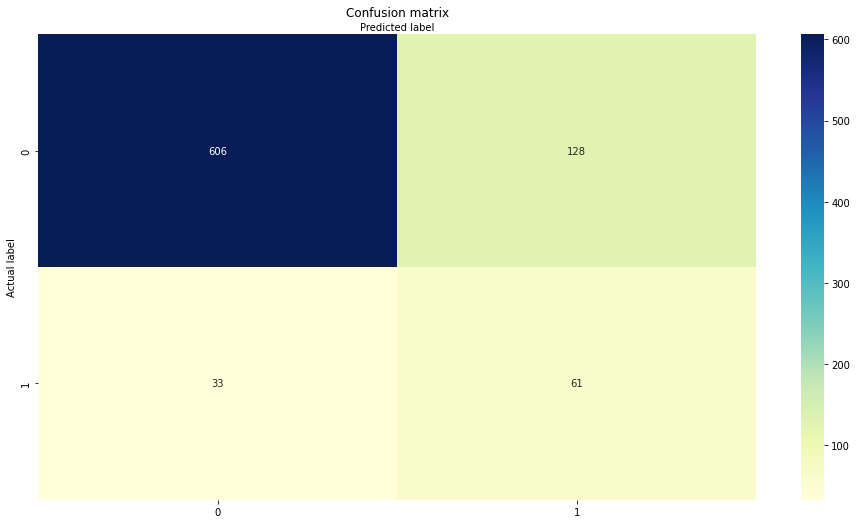

In [56]:
# Import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(13,7))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_DecTree), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [57]:
v=list(X_train.columns)
v

['CURRENT_AGE',
 'AVG_FLIGHT_BLOCKHOURS',
 'CONTRACTS_WORKED',
 'TOTAL_LAYOVERS',
 'INT_COUNT',
 'DOM_COUNT',
 'CHANGE_IN_HOURS_TRAN',
 'CHANGEINOFFDUTY_TRAN',
 'CHANGEINTRAINING_TRAN',
 'CHANGEINDHTIME_TRAN',
 'AVG_DELAY_TRAN',
 'AVG_NO_OF_DELAYS_TRAN',
 'LATENIGHT_TRAN',
 'DOM_COUNT_TRAN',
 'FLEET_747',
 'FLEET_767',
 'FLEET_777',
 'SEAT_FO']

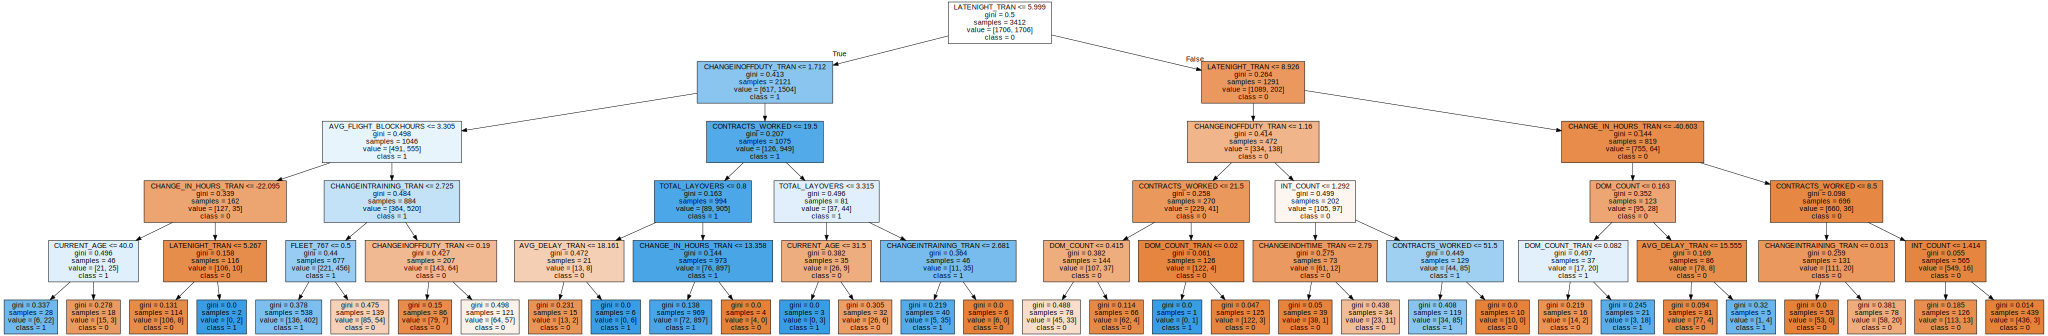

In [58]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(model_DecTree, out_file=None, 
                                feature_names=v,  
                                class_names=['0','1'],filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [59]:
graph.render("decision_tree_CapstoneTEAM-7_graphivz_DS")

'decision_tree_CapstoneTEAM-7_graphivz_DS.png'

     |████████████████████████████████| 62 kB 575 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.2-py3-none-any.whl size=67936 sha256=a5d9748ed30831bbe13299d85b775ea4c1b4401348a3c67889200633d6956d5f
  Stored in directory: /root/.cache/pip/wheels/9d/29/a1/f2ad20de79875e749330d5c6234fc5f517991fcaa23d7a3d0f
Successfully built dtreeviz


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


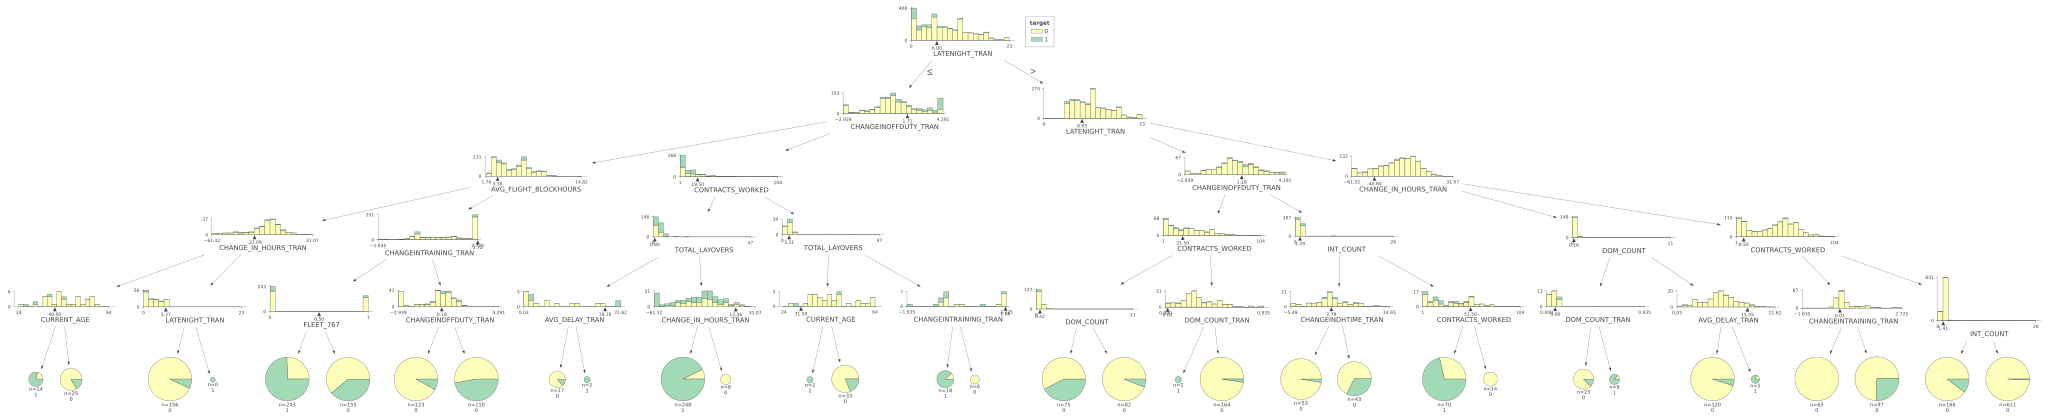

In [60]:
!pip install dtreeviz
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(model_DecTree, X, y,target_name="target",feature_names=v,class_names=['0','1'])
viz

In [61]:
viz.save("decision_tree_CapstoneTEAM-7_DS.svg")

## **KNN**


In [62]:
from sklearn.neighbors import KNeighborsClassifier
# KNN model requires you to specify n_neighbors,
# the number of points the classifier will look at to determine what class a new point belongs to
KNN_model = KNeighborsClassifier(n_neighbors=2)
KNN_model.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_KNN = KNN_model.predict(X_test)

accuracy_KNN = accuracy_score(y_pred_KNN,y_test)*100
print('\nAccuracy:',accuracy_KNN)

precision_KNN = metrics.precision_score(y_test, y_pred_KNN)
print("\nPrecision:",precision_KNN)

recall_KNN = metrics.recall_score(y_test, y_pred_KNN)
print("\nRecall:",recall_KNN)

cm_KNN = confusion_matrix(y_test, y_pred_KNN)
print('\nConfusionMatrix:\n', cm_KNN)

print('\nClassification_report:\n',classification_report(y_test,y_pred_KNN))


Accuracy: 84.78260869565217

Precision: 0.34615384615384615

Recall: 0.3829787234042553

ConfusionMatrix:
 [[666  68]
 [ 58  36]]

Classification_report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       734
           1       0.35      0.38      0.36        94

    accuracy                           0.85       828
   macro avg       0.63      0.65      0.64       828
weighted avg       0.85      0.85      0.85       828



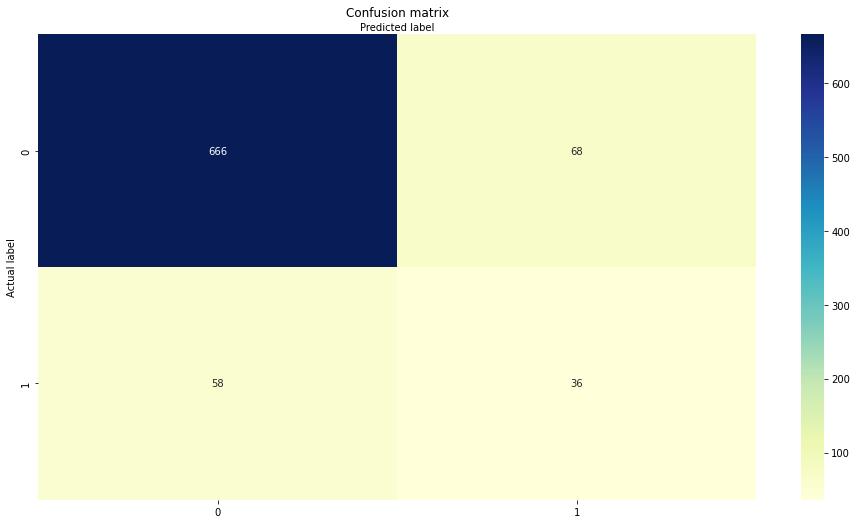

In [63]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(13,7))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_KNN), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### Additional Error Methodology for KNN

In [64]:
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_SMOTE,y_train_SMOTE)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

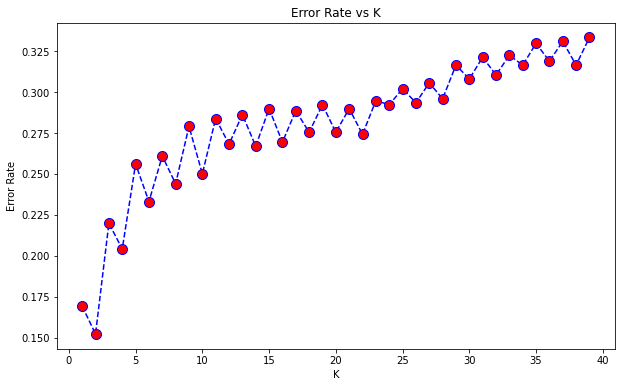

In [65]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

We see that at K=2, we obtain a minimum error of 0.15

## **AdaBoostClassifier**


In [66]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
model_ada = AdaBoostClassifier(n_estimators=100, random_state=42)
model_ada.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_ada=model_ada.predict(X_test)

accuracy_ada = accuracy_score(y_pred_ada,y_test)*100
print('\nAccuracy:',accuracy_ada)

precision_ada = metrics.precision_score(y_test, y_pred_ada)
print("\nPrecision:",precision_ada)

recall_ada = metrics.recall_score(y_test, y_pred_ada)
print("\nRecall:",recall_ada)

cm_ada = confusion_matrix(y_test, y_pred_ada)
print('\nConfusionMatrix:\n', cm_ada)

print('\nClassification_report:\n',classification_report(y_test,y_pred_ada))


Accuracy: 85.26570048309179

Precision: 0.39705882352941174

Recall: 0.574468085106383

ConfusionMatrix:
 [[652  82]
 [ 40  54]]

Classification_report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91       734
           1       0.40      0.57      0.47        94

    accuracy                           0.85       828
   macro avg       0.67      0.73      0.69       828
weighted avg       0.88      0.85      0.86       828



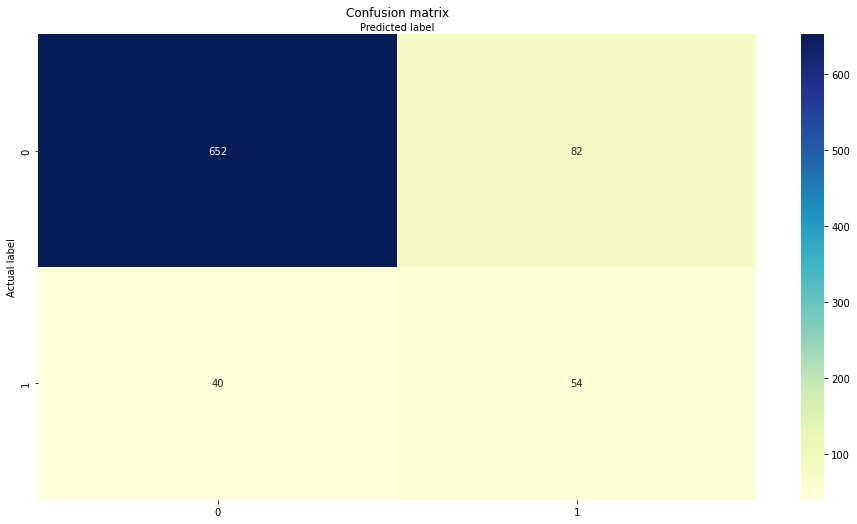

In [67]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(13,7))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_ada), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## **Random Forest Classifier**


In [68]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(max_depth=100, random_state=42)
model_rfc.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_rfc=model_rfc.predict(X_test)

accuracy_rfc = accuracy_score(y_pred_rfc,y_test)*100
print('\nAccuracy:',accuracy_rfc)

precision_rfc = metrics.precision_score(y_test, y_pred_rfc)
print("\nPrecision:",precision_rfc)

recall_rfc = metrics.recall_score(y_test, y_pred_rfc)
print("\nRecall:",recall_rfc)

cm_rfc = confusion_matrix(y_test, y_pred_rfc)
print('\nConfusionMatrix:\n', cm_rfc)

print('\nClassification_report:\n',classification_report(y_test,y_pred_rfc))


Accuracy: 91.54589371980676

Precision: 0.6621621621621622

Recall: 0.5212765957446809

ConfusionMatrix:
 [[709  25]
 [ 45  49]]

Classification_report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       734
           1       0.66      0.52      0.58        94

    accuracy                           0.92       828
   macro avg       0.80      0.74      0.77       828
weighted avg       0.91      0.92      0.91       828



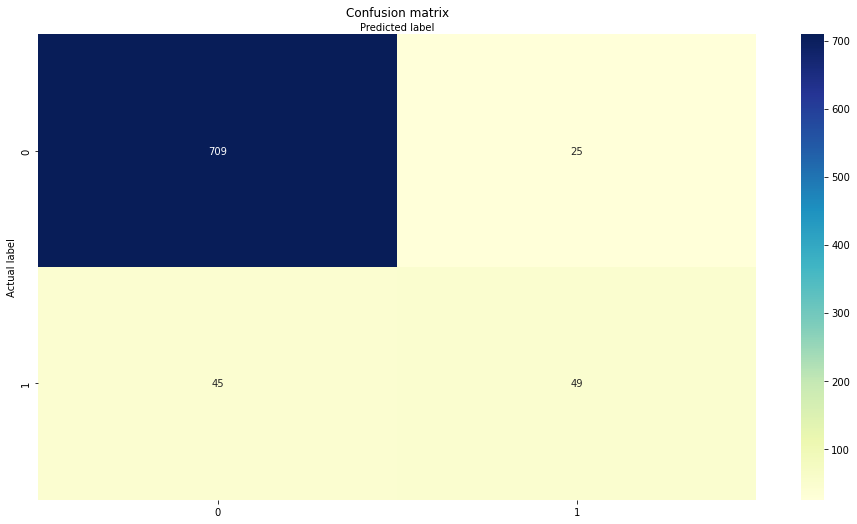

In [69]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(13,7))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_rfc), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## **Gradient Boosting Classifier**


In [70]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=42).fit(X_train, y_train)
y_pred_gbc=model_gbc.predict(X_test)

accuracy_gbc = accuracy_score(y_pred_gbc,y_test)*100
print('\nAccuracy:',accuracy_gbc)

precision_gbc = metrics.precision_score(y_test, y_pred_gbc)
print("\nPrecision:",precision_gbc)

recall_gbc = metrics.recall_score(y_test, y_pred_gbc)
print("\nRecall:",recall_gbc)

cm_gbc = confusion_matrix(y_test, y_pred_gbc)
print('\nConfusionMatrix:\n', cm_gbc)

print('\nClassification_report:\n',classification_report(y_test,y_pred_gbc))


Accuracy: 91.18357487922705

Precision: 0.723404255319149

Recall: 0.3617021276595745

ConfusionMatrix:
 [[721  13]
 [ 60  34]]

Classification_report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       734
           1       0.72      0.36      0.48        94

    accuracy                           0.91       828
   macro avg       0.82      0.67      0.72       828
weighted avg       0.90      0.91      0.90       828



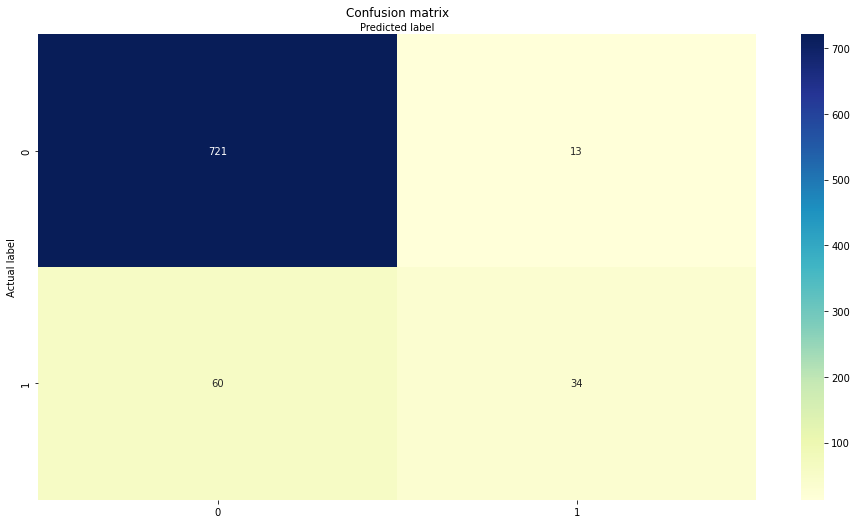

In [71]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(13,7))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_gbc), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## **Extra Trees Classifier**


In [72]:
from sklearn.ensemble import ExtraTreesClassifier
model_etc = ExtraTreesClassifier(n_estimators=100, random_state=42)
model_etc.fit(X_train, y_train)
y_pred_etc = model_etc.predict(X_test)


accuracy_etc = accuracy_score(y_pred_etc,y_test)*100
print('\nAccuracy:',accuracy_etc)

precision_etc = metrics.precision_score(y_test, y_pred_etc)
print("\nPrecision:",precision_etc)

recall_etc = metrics.recall_score(y_test, y_pred_etc)
print("\nRecall:",recall_etc)

cm_etc = confusion_matrix(y_test, y_pred_etc)
print('\nConfusionMatrix:\n', cm_etc)

print('\nClassification_report:\n',classification_report(y_test,y_pred_etc))


Accuracy: 92.512077294686

Precision: 0.9444444444444444

Recall: 0.3617021276595745

ConfusionMatrix:
 [[732   2]
 [ 60  34]]

Classification_report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       734
           1       0.94      0.36      0.52        94

    accuracy                           0.93       828
   macro avg       0.93      0.68      0.74       828
weighted avg       0.93      0.93      0.91       828



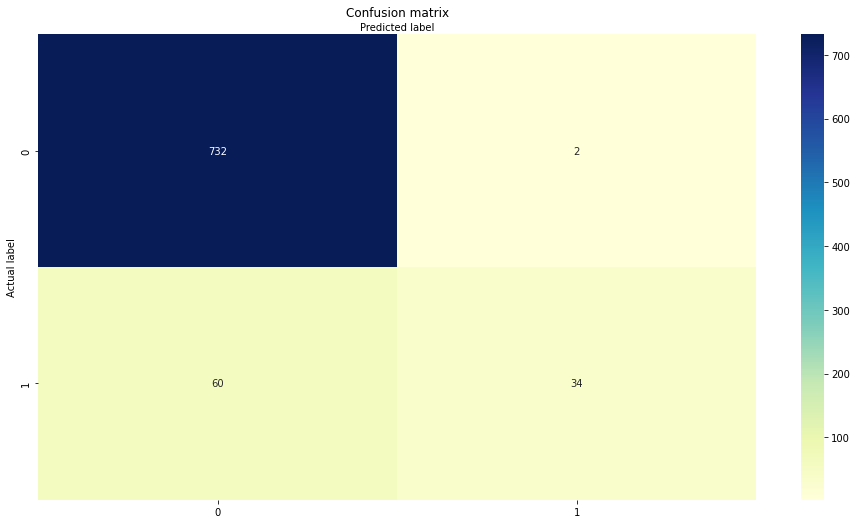

In [73]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(13,7))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_etc), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# **Assessment**
---
In this final process of SEMMA we will be assessing various parameter to decide on the Best Model that gives good Prediction.

The 3 key factors that we will be using to finalize the Best model are:

* Accuracy
* Recall
* Interpretability


In [74]:
accuracy = [accuracy_logistic,accuracy_DecTree,accuracy_KNN,accuracy_ada,accuracy_rfc,accuracy_gbc,accuracy_etc]
recall = [recall_logistic,recall_DecTree,recall_KNN,recall_ada,recall_rfc,recall_gbc,recall_etc]
precision = [precision_logistic,precision_DecTree,precision_KNN,precision_ada,precision_rfc,precision_gbc,precision_etc]

accuracy =  [round(elem, 2) for elem in accuracy]
recall =  [round(elem, 2) for elem in recall]
precision =  [round(elem, 2) for elem in precision]

col = {'Accuracy in %': accuracy, 'Recall': recall, 'Precision':precision}
models=['Logistic Regression','Decision Tree','KNN','AdaBoost Classifier','Random Forest Classifier','Gradient Boosting Classifier','Extra Trees Classifier']
assess = pd.DataFrame(data = col, index = models)
assess

print(accuracy)
print(precision)
print(recall)
assess

[82.49, 80.56, 84.78, 85.27, 91.55, 91.18, 92.51]
[0.36, 0.32, 0.35, 0.4, 0.66, 0.72, 0.94]
[0.71, 0.65, 0.38, 0.57, 0.52, 0.36, 0.36]


,Accuracy in %,Recall,Precision
Logistic Regression,82.49,0.71,0.36
Decision Tree,80.56,0.65,0.32
KNN,84.78,0.38,0.35
AdaBoost Classifier,85.27,0.57,0.40
Random Forest Classifier,91.55,0.52,0.66
Gradient Boosting Classifier,91.18,0.36,0.72
Extra Trees Classifier,92.51,0.36,0.94


### **Accuracy**
---
Below is the bar chart for Accuracy values of all the models. 

Accuracy helps us to determine how well the True Positives and True Negatives are categorized in our model.

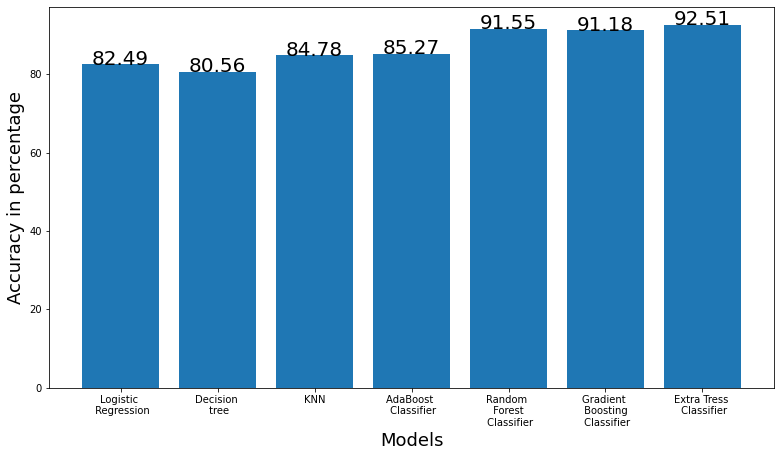

In [75]:
# importing library
import matplotlib.pyplot as plt
  
# function to add value labels
def addlabels(models,accuracy):
    for i in range(len(models)):
        plt.text(i, accuracy[i], accuracy[i], ha = 'center',fontsize=20)
  
if __name__ == '__main__':
    
    # creating data on which bar chart will be plot
    models = ['Logistic \n Regression', 'Decision \n tree', 'KNN', 'AdaBoost \n Classifier', 'Random \n Forest \n Classifier', 'Gradient \n Boosting \n Classifier', 'Extra Tress \n Classifier']
    accuracy = accuracy
      
    # setting figure size by using figure() function 
    plt.figure(figsize = (13, 7))
      
    # making the bar chart on the data
    plt.bar(models, accuracy)
      
    # calling the function to add value labels
    addlabels(models, accuracy)
      
    # giving title to the plot
    #plt.title("Accuracy of all models", fontsize=20)
      
    # giving X and Y labels
    plt.xlabel("Models", fontsize=18)
    plt.ylabel("Accuracy in percentage", fontsize=18)
      
    # visualizing the plot
    plt.show()

We see that the Accuracy of AdaBoost Classifier and other Ensemble models are high and above 85%

### **Recall**
---
Below is the bar chart for Recall values of all the models.

Recall is very key factor for our modeling part as we need to concentrate on the False Negatives. Its definitely a loss to company if our model predicts a crew id as not attrited where in actual scenario the employee is attrited. Hence, its very much important to acheive a good recall value for an Attrition Model.

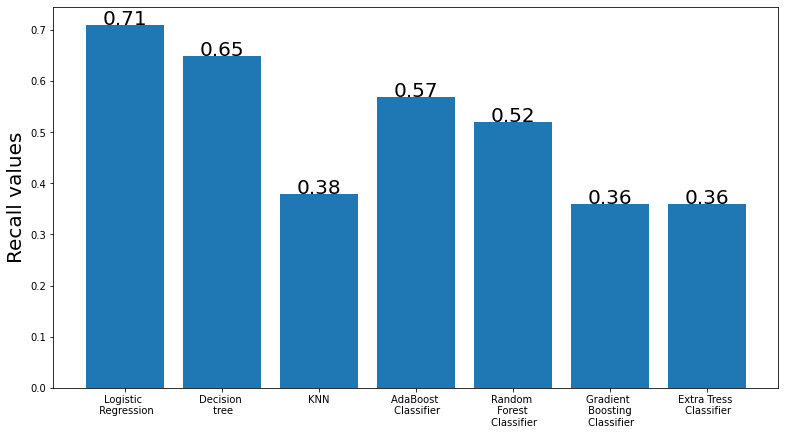

In [76]:
# function to add value labels
def addlabels(models,recall):
    for i in range(len(models)):
        plt.text(i, recall[i], recall[i], ha = 'center',fontsize=20)
  
if __name__ == '__main__':
    
    # creating data on which bar chart will be plot
    models = ['Logistic \n Regression', 'Decision \n tree', 'KNN', 'AdaBoost \n Classifier', 'Random \n Forest \n Classifier', 'Gradient \n Boosting \n Classifier', 'Extra Tress \n Classifier']
    recall = recall
      
    # setting figure size by using figure() function 
    plt.figure(figsize = (13, 7))
      
    # making the bar chart on the data
    plt.bar(models, recall)
      
    # calling the function to add value labels
    addlabels(models, recall)
      
    # giving title to the plot
    #plt.title("Recall of all models", fontsize=20)
      
    # giving X and Y labels
    #plt.xlabel("Models", fontsize=18)
    plt.ylabel("Recall values", fontsize=20)

We see that Logistic Regression Model and Decision Tree Model has a highest Recall value. 

## **Interpretability**

Logistic regression and Decision Tree Models are 2 models which gives high detailed information on the key variables leading to the Attrition of Employees compared to all other models as they are ensemble models and hard to Interpret.

# **Conclusion**
---
Hence, based on the Accuracy, Recall and Interpretability - we can see that Logistic regression and Decision Tree model are the two which would be the best model for our predition.

As Logistic regression as Higher accuracy and high recall value, hence the best model is Logistic regression model. 

Based on the Odds ratio in the Logistic Regression, we see below columns are contributing towards the Attrition of Employees.

* International Trips Counts
* Change in Off Duty
* Domestic Trips Count
* Average Flight Block Hours
* Average Delay
* Change in Dead Head Time